# The Story of Mall X

Mall X is one of the **oldest and most established** shopping malls in Singapore. Selling a broad range of products ranging from your everyday produce to luxurious gold bars and wines, Mall X **caters to a wide variety of customers**. For several years, Mall X had been constantly ranked as Singapore's highest earning shopping mall.


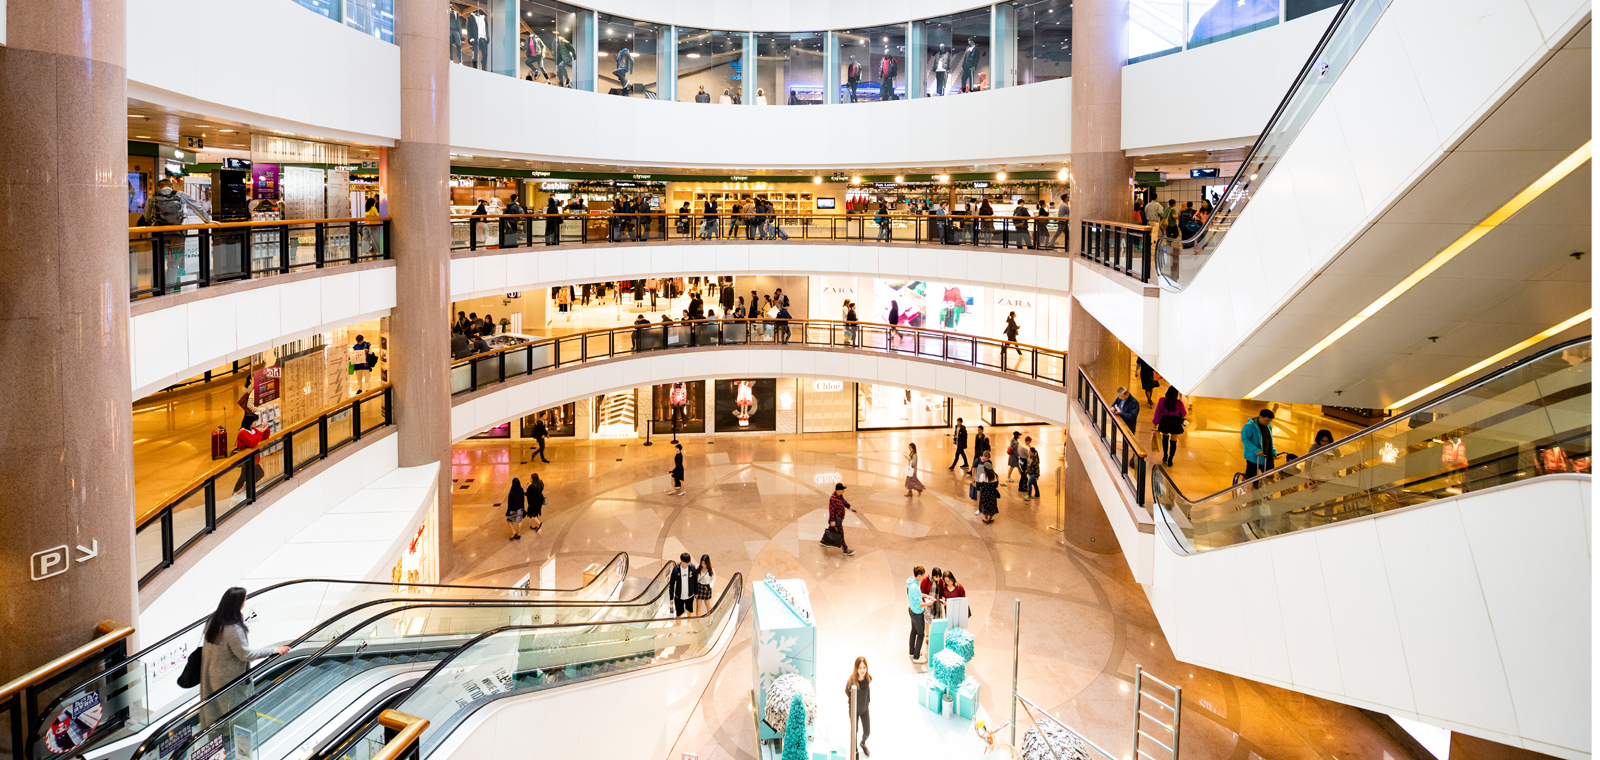

## However when the pandemic struck ...

... , **sales plummeted and revenue plunged** as the circuit breaker forced many to stay at home. Even as the situation got better and movement restrictions were lifted, sales continued remaining sluggish.
Eventually, Mall X got overtaken by its rival, Mall Y, and was **no longer the top earning shopping mall** in Singapore

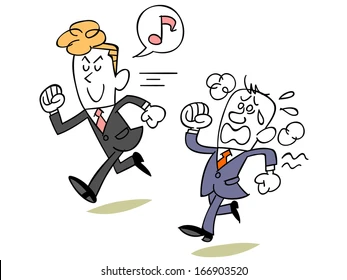

## The boss became ANGRY :(

Seeking to reclaim its title and return to its good'ol glory days, the boss ordered the marketing team to devise ways of drawing its customers back. However, as money was an issue, the team was tasked to **do so without incurring any extra cost as far as possible** as that will further reduce the mall's profits. 

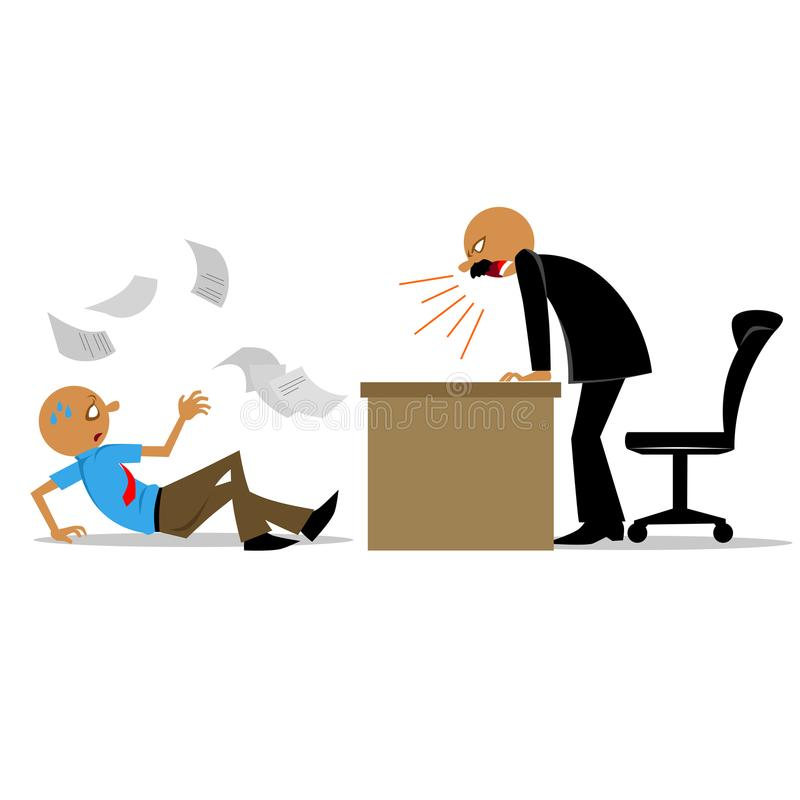

## The briliant Idea

After being wrecked by the boss, the marketing team scambled to search for answers. At this moment, three analysts from the team got a briliant idea. 

While looking through the current advertisements put out by the Mall, they noticed that the **advertisements put out were not very effective**. For instance, although the mall had an online page, the mall spent most of its advertisement budget printing traditional advertisements like posters that were displayed within the mall. Furthermore, the advertisements were not advertising high profit-margin items.

<br>

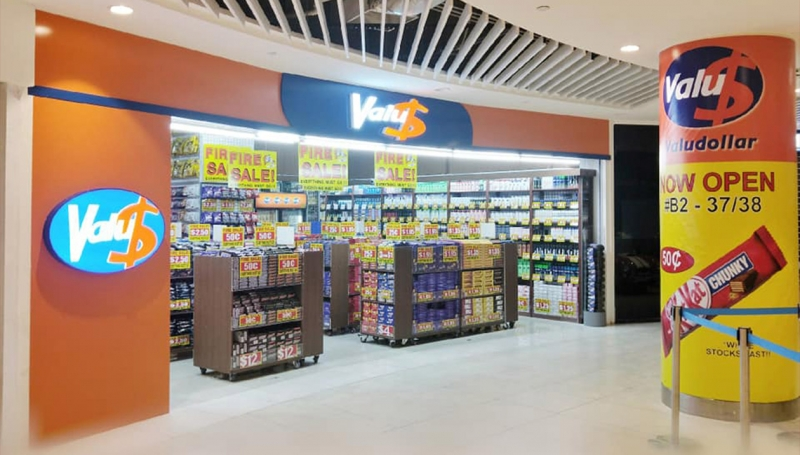

<br>


Hence, the analysts suggested **improving the advertisements of the mall**.

To do so, the marketing team decided to analyse the profile of the malls customers through **customer segmentation with K-Prototypes**. However as the mall was complacent throughout the years of its success, its last study on its customers was in **2014** (Saldanha, 2020)! Nonetheless, having data is better than having no data *(and this is just a hypothetical scenario)*.

Using insights gained from the process, the team would then decide on how to optimise the advertisements put out through **considering the following questions**

### Key Questions
>- What products should be advertised?
>- Which purchasing platform (e.g. physical stores, website) to advertise the chosen products?
>- Should there be any promotions as part of the advertisement?

# Basic Description of the Dataset

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
# Importing the dataset
mktdata = pd.read_csv('marketing_campaign.csv')

#Size and number of columns (variables) in the dataframe
mktdata.shape

(2240, 29)

In [4]:
# Printing all variables with their index
index=0
for i in mktdata.columns:
    print(f"{index}. {i}")
    index+=1

0. ID
1. Year_Birth
2. Education
3. Marital_Status
4. Income
5. Kidhome
6. Teenhome
7. Dt_Customer
8. Recency
9. MntWines
10. MntFruits
11. MntMeatProducts
12. MntFishProducts
13. MntSweetProducts
14. MntGoldProds
15. NumDealsPurchases
16. NumWebPurchases
17. NumCatalogPurchases
18. NumStorePurchases
19. NumWebVisitsMonth
20. AcceptedCmp3
21. AcceptedCmp4
22. AcceptedCmp5
23. AcceptedCmp1
24. AcceptedCmp2
25. Complain
26. Z_CostContact
27. Z_Revenue
28. Response


<br>
<br>

## The following are the description of each variable in the Dataset


### **People** 
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Products

### **Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

### **Promotion** 
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### **Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [292]:
mktdata.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

<br>
<br>
<br>
<br>

---

# A) <u>Data Preparation</u>

## Drop unneeded columns
First, we decided to drop the following columns as they were not relevant. 

> - ID
> - NumDealsPurchases (we dropped this as this includes discounted items not from promotional campaigns)
> - Complain 
> - Z_CostContact
> - Z_Revenue
> - Dt_customer
> - Recency

Note that for Recency, which tells us the number of days since the customer's last purchase, the maximum number of days was 99 days which we considered as recent. Hence, we decided to drop this column as all data points are equally  as recent as the year of data collection (2014)

In [5]:
new_df = mktdata.drop(mktdata.iloc[:,[0,15,25,26,27,7,8]], axis=1, inplace  =False)

<br>
<br>

## Pre-EDA observation of variables 

In [294]:
new_df.describe()

Year_Birth         Income      Kidhome     Teenhome     MntWines  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250   303.935714   
std      11.984069   25173.076661     0.538398     0.544538   336.597393   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    23.750000   
50%    1970.000000   51381.500000     0.000000     0.000000   173.500000   
75%    1977.000000   68522.000000     1.000000     1.000000   504.250000   
max    1996.000000  666666.000000     2.000000     2.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count   2240.000000      2240.000000          2240.000000        2240.000000   
mean      44.021875         4.084821             2.662054           5.790179   
std       52.167439         2.778714             2.923101           3.250958   
min        0.000000         0.000000             0.000000           0.000000   
25%        9.000000         2.000000             0.000000           3.000000   
50%       24.000000         4.000000             2.000000           5.000000   
75%       56.000000         6.000000             4.000000           8.000000   
max      362.000000        27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response  
count   2240.000000   2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107  
std        0.245316      0.114976     0.356274  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
50%        0.000000      0.000000     0.000000  
75%        0.000000      0.000000     0.000000  
max        1.000000      1.000000     1.000000

### Observation from above description
From the above description, we identified some points that are worth taking note of.

**Year_Birth**<br>
>First of all for Year_Birth, the minimum birth year is 1893 which is a very long time ago. This would mean that the person is 121 years old which is impossible given that the oldest person living in 2014 was Misao Okawa who was 116 years old in 2014. This means that this datapoint is wrong for Year_Birth and not credible. We will take note of this and see if there are any other such datapoints like such later on.

**Income**<br>
>Next, the maximum income is also really high at 666,666. This could very well be an outlier as the median for income stands at 51381.50. So we will check for it later on as well.

**Amount spent on products**<br>
>Lastly, we also noted that the maximum amount spent on Wine and Meat products in our mall were exceptionally high compared to the max amount spent on the other goods that are available (1493 and 1725 for Wine and Meat median respectively). Besides, the median amount spent on these two products are also much higher than the median amount spent on other kind of goods (173.5 and 67 for Wine and Meat respectively). We will note this observation and check it again later when we explore further. 

<br>
<br>

## Changing "Year_Birth" to "Age"

As we found ourselves constantly calculating the age from the Year_Birth, we decided to **convert Year_Birth to Age**

In [6]:
#Create a series of ages
age_array = 2014-new_df["Year_Birth"]

# Change series to dataframe and concatenate together with old dataframe
new_df2 = pd.DataFrame(age_array).rename(columns={"Year_Birth":"Age"})

new_df3 = pd.concat([new_df2, new_df], axis=1)
new_df4 = new_df3.drop(new_df3.iloc[:,[1]], axis=1, inplace=False)

<br>
<br>

## Combining "AcceptedCmp1-5" and "Response" into a single row called "Receptiveness"
Given that "AcceptedCmp1-5" and "Response" tells us in which promotion campaign out of the 6 the mall had the customer accepted the offer, we **simplified it into whether a customer is receptive to a promotion or not**. As long as the customer accepted at least one promotion out of the 6, that customer will be deemed as receptive to promotions. If the customer did not accept any of the 6 promotions, he will be deemed as unreceptive.

In [7]:
Acceptances = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
result = []
for index, row in new_df4.iterrows():
    for acceptance in Acceptances:
        if row[acceptance]==1:
            result.append("Yes")
            break
    else:
        result.append("No")
        
new_df4.drop(Acceptances, axis=1, inplace = True)
new_df4["Receptiveness"] = result

<br>
<br>

## Modifying NA values

From the above analysis, we observed that only **"Income" has null values**. We can determine this as the original dataset has 2240 data points and the other variables have 2240 non-null datapoints except for income which has 2216 (See info of variables above and mktdata.shape even higher up). <br>


In our research, we learnt that there are two ways to deal with missing numerical data: **Complete Case Analysis and Arbitrary Value imputation** (*Imputation techniques: What are the types of imputation techniques*, 2021). 

As the missing values of income accounts for **less than 5% of all datapoints {(2240-2216)/2240 = 1.07%}**, we decided to go with the first method which involves **dropping these datapoints** since they only account for a small proportion of the data. However, we **assume that the data is missing at random** here. 

<br>

In [8]:
# Shows that all rows with null values
new_df4[new_df4.isnull().any(axis=1)]

Age   Education Marital_Status  Income  Kidhome  Teenhome  MntWines  \
10     31  Graduation        Married     NaN        1         0         5   
27     28  Graduation         Single     NaN        1         0         5   
43     55         PhD         Single     NaN        0         0        81   
48     63  Graduation         Single     NaN        2         1        48   
58     32  Graduation         Single     NaN        1         0        11   
71     41    2n Cycle        Married     NaN        1         0        25   
90     57         PhD        Married     NaN        2         1       230   
91     57  Graduation         Single     NaN        1         1         7   
92     41      Master       Together     NaN        0         0       445   
128    53         PhD        Married     NaN        0         1       352   
133    51  Graduation        Married     NaN        0         1       231   
312    25  Graduation        Married     NaN        0         0       861   
319    44  Graduation         Single     NaN        1         2       738   
1379   44      Master       Together     NaN        0         1       187   
1382   56  Graduation       Together     NaN        1         1        19   
1383   50    2n Cycle         Single     NaN        1         1         5   
1386   42         PhD       Together     NaN        1         0        25   
2059   45      Master       Together     NaN        1         1       375   
2061   33         PhD         Single     NaN        1         0        23   
2078   43  Graduation        Married     NaN        1         1        71   
2079   60      Master       Together     NaN        0         1       161   
2081   59  Graduation         Single     NaN        0         1       264   
2084   71      Master          Widow     NaN        0         0       532   
2228   36    2n Cycle       Together     NaN        0         0        32   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
10            5                6                0                 2   
27            1                3                3               263   
43           11               50                3                 2   
48            5               48                6                10   
58            3               22                2                 2   
71            3               43               17                 4   
90           42              192               49                37   
91            0                8                2                 0   
92           37              359               98                28   
128           0               27               10                 0   
133          65              196               38                71   
312         138              461               60                30   
319          20              172               52                50   
1379          5               65               26                20   
1382          4               12                2                 2   
1383          1                9                2                 0   
1386          1               13                0                 0   
2059         42               48               94                66   
2061          0               15                0                 2   
2078          1               16                0                 0   
2079          0               22                0                 0   
2081          0               21               12                 6   
2084        126              490              164               126   
2228          2             1607               12                 4   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
10               1                1                    0                  2   
27             362               27                    0                  0   
43              39                1                    3           

In [9]:
new_df4.dropna(inplace=True)

In [10]:
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [11]:
# Shows that all rows with null values have been removed successfully
new_df4[new_df4.isnull().any(axis=1)]

Empty DataFrame
Columns: [Age, Education, Marital_Status, Income, Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Receptiveness]
Index: []

<br>
<br>
<br>
<br>

---

# <u> B) Exploratory Data Analysis</u>

## Now lets take a look at all the variables

> Exploring the different variables here requires us to really understand what each variable mean. After studying the description of the variables above, we first checked out the basic information of each variable with the .info() method

In [301]:
# Gives a general information of all variables
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

## Features and Response variables
As we are performing a cluster analysis on the dataset, some of the variables must be **features used to cluster the data** while the rest are **response variables that will be studied for each of the clusters** formed later on.

According to the three key questions that we mentioned earlier on, it is clear that our **response variables should be those pertaining to the amount spent on products, number of visits or purchases on the various purchasing platforms and receptivity towards promotions and discounts**. In addition, **feature variables should be those that might have a relation with these response variables**. For instance, "Income" should be a feature here since one's level of income could influence his spending decisions and hence the amount of Wine he buys ("MntWines").

Hence, the following are our selected feature and response variables. As we proceed with the exploratory data analysis, we will also perform some **feature selection** to determine if the feature variables we identified here are good or not.

### **Feature variables**
>- Age
>- Income
>- Kidhome
>- Teenhome
>- Education
>- Marital_Status


### **Response variables**
>- MntWines
>- MntFruits           
>- MntMeatProducts    
>- MntFishProducts   
>- MntSweetProducts     
>- MntGoldProds
>-  NumWebPurchases        
>-  NumCatalogPurchases
>-  NumStorePurchases   
>-  NumWebVisitsMonth   
>- Receptiveness

<br>

## Distinguishing between Numerical and Categorical data

>As with all datasets, it is important to distinguish between the two types of data, especially since there could be numerical variables that are not continuous and numerically encoded categorical variables. 

First and foremost, we separated the variables into two categories based on their data type (int64/float64 and object)<br>
Looking at the above information, the two categories are as follows:

#### **int64 / float64**
> - Age
>- Income
>- Kidhome
>- Teenhome
>- MntWines             
>- MntFruits           
>- MntMeatProducts    
>- MntFishProducts   
>- MntSweetProducts     
>- MntGoldProds          
>-  NumWebPurchases        
>-  NumCatalogPurchases
>-  NumStorePurchases   
>-  NumWebVisitsMonth    


#### **object**
>- Education
>-  Marital_Status
>- Receptiveness

<br>

### However, not all of the variables in the int64 / float64 category are continuous numeric variables 

#### 1. Kidhome and Teenhome
Firstly, although "Kidhome" and "Teenhome" data types are integers, these two are not continuous but **discrete numeric variables** as seen below. It is important to identify them as these variables are not compatible with distance-based clustering models like K-Means. As we will be using K-Prototypes which is a combination of K-Means and K-Modes, we will deal with these two variables later.

In [302]:
new_df4.Kidhome.unique()

array([0, 1, 2], dtype=int64)

In [303]:
new_df4.Teenhome.unique()

array([0, 1, 2], dtype=int64)

#### 2. NumWebPurchases, NumCatelogPurchases, NumStorePurchases,  NumWebVisitsMonth
Like Kidhome and Teenhome, these 4 variables are **discrete numeric variables** as the number of visits or purchases must be a whole number. However, these variables are **not features used for the clustering** as we will be studying these variables on each of the clusters instead. Nonetheless, just pointing it out :)

In [304]:
for i in new_df4.columns[16:]:
    print(i, ":")
    print("\tUnique levels: ",new_df4[i].unique(), '\n')

Receptiveness :
	Unique levels:  ['Yes' 'No'] 



## Therefore we have three different kinds of variables in total

### **Continuous Numerical Variables**
>- Age
>- Income
>- MntWines             
>- MntFruits           
>- MntMeatProducts    
>- MntFishProducts   
>- MntSweetProducts     
>- MntGoldProds

### **Discrete Numerical Variables**
>- Kidhome
>- Teenhome
>-  NumWebPurchases        
>-  NumCatalogPurchases
>-  NumStorePurchases   
>-  NumWebVisitsMonth   

### **Categorical Variables**
>- Education
>- Marital_Status
>- Receptiveness

<br>
<br>

<br>
<br>

# *Numerical Variables*
<br>
<br>

# <u>Uni-variate Exploration</u>

## 1. Income and Age (Clustering Features)

First, lets explore the distributions of "Income" and "Age" which are the two numeric features that will be used for clustering.

<AxesSubplot:>

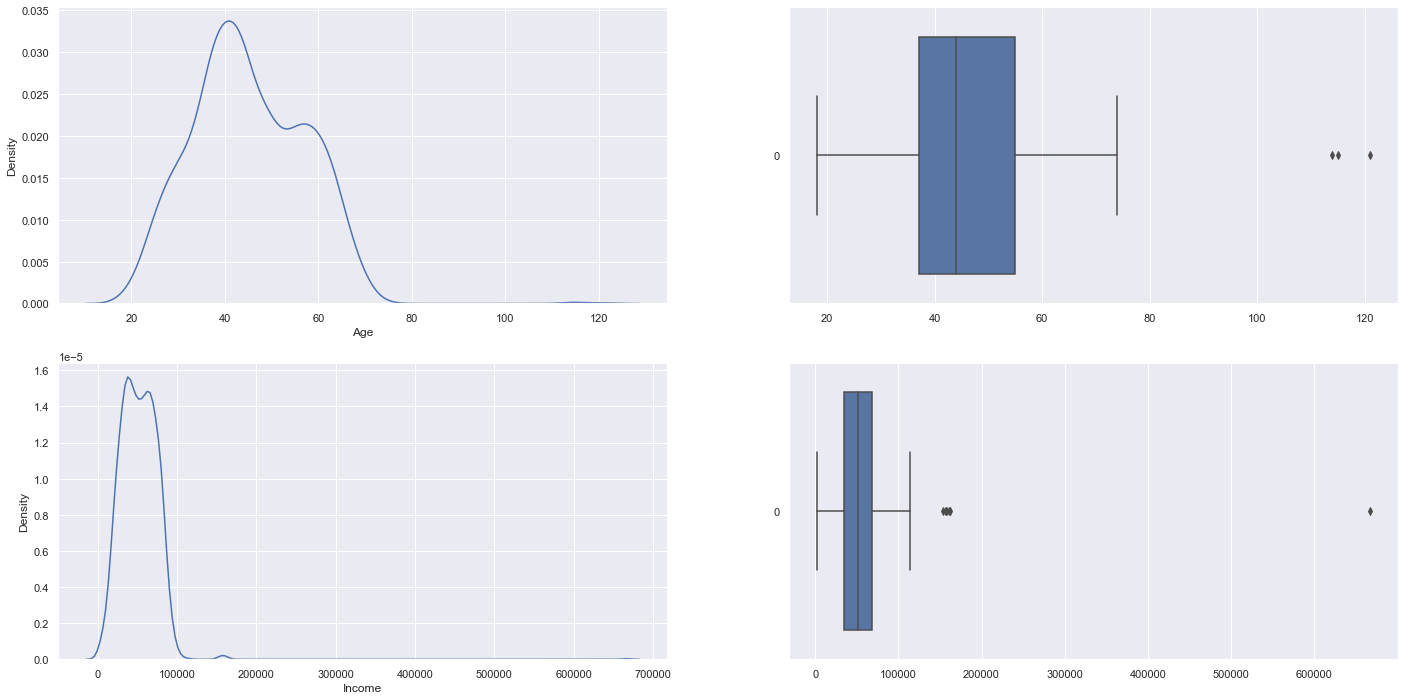

In [305]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.kdeplot(data=new_df4.Age, ax=axes[0,0])
sb.boxplot(data=new_df4.Age, ax=axes[0,1], orient="h")
sb.kdeplot(data=new_df4.Income, ax=axes[1,0])
sb.boxplot(data=new_df4.Income, ax=axes[1,1], orient="h")

### Observation
As determined earlier, indeed there are outliers for both "Age" and "Income".

**Age**
>For "Age", there are 3 datapoints with Age greater than 100. These datapoints are outlliers for Age.

**Income**
>For "Income", there is one particular datapoint that is really far from the distribution (probably the datapoint with income 666,666 that we have spotted earlier) while there is a small group of a few datapoints outside the right whisker of the box plot. These datapoints are also outliers for "Income".


## Dropping Outliers? (Anomaly Detection)

### Age: The three outliers

>First, we obtain the rows of the three datapoints who are outliers in Age

In [12]:
new_df4.loc[new_df4.Age>80]

Age Education Marital_Status   Income  Kidhome  Teenhome  MntWines  \
192  114  2n Cycle       Divorced  36640.0        1         0        15   
239  121  2n Cycle         Single  60182.0        0         1         8   
339  115       PhD       Together  83532.0        0         0       755   

     MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
192          6                8                7                 4   
239          0                5                7                 0   
339        144              562              104                64   

     MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192            25                2                    1                  2   
239             2                1                    0                  2   
339           224                4                    6                  4   

     NumWebVisitsMonth Receptiveness  
192                  5            No  
239                  4            No  
339                  1           Yes

#### Why drop age?
Now, we can clearly see that in the current dataframe, there are three datapoints with ages 114, 121 and 115 (means they were born in 1900, 1893, 1899 respectively). Apart from these 3 datapoints, the rest of the datapoints have ages less than 80 as evinced from the boxplot plotted earlier on.

As mentioned earlier, it is impossible for anyone to be aged 121 since the oldest person alive then was 116 years old. Therefore, this row with age 121 should be dropped as an erroneous data for Age affects the credibility of the data for other variables in this row. 

Given that the data point with age 121 was wrong, it may be likely that these two data points are wrong as well as it is incredibly rare for someone that age to be alive. Hence, Year_Birth for these two datapoints may be incorrect as well, rendering these two rows untrustworthy.

Therefore, we decided to drop these 3 rows.

In [13]:
new_df4 = new_df4.drop(new_df4[new_df4.Age>80].index)
#new_df = new_df.drop(new_df[new_df.Marital_Status=='YOLO'].index)
#new_df = new_df.drop(new_df[new_df.Marital_Status=='Alone'].index)
#new_df = new_df.drop(new_df[new_df.Marital_Status=='Absurd'].index)
#new_df = new_df.drop(new_df[new_df.Income==666666].index)

#Reset index
new_df4.reset_index(drop=True, inplace=True)

In [14]:
# Showing that 3 datapoints were dropped
new_df4.shape

(2213, 17)

### Income: The outliers
> Similarly, we first obtain the rows containing these outliers

In [15]:
upquan = new_df4.Income.quantile(0.75)
lowquan = new_df4.Income.quantile(0.25)    
IQR = upquan-lowquan
lgstnon = upquan +1.5*IQR
        
new_df4.loc[ new_df4.Income>lgstnon]

Age   Education Marital_Status    Income  Kidhome  Teenhome  MntWines  \
153    41         PhD        Married  157243.0        0         1        20   
601    38         PhD       Together  162397.0        1         1        85   
639    39  Graduation       Divorced  153924.0        0         0         1   
671    32         PhD        Married  160803.0        0         0        55   
1284   43      Master       Together  157733.0        1         0        39   
1633   37  Graduation       Together  157146.0        0         0         1   
2106   65         PhD        Married  156924.0        0         0         2   
2206   37  Graduation       Together  666666.0        1         0         9   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
153           2             1582                1                 2   
601           1               16                2                 1   
639           1                1                1                 1   
671          16             1622               17                 3   
1284          1                9                2                 0   
1633          0             1725                2                 1   
2106          1                2                1                 1   
2206         14               18                8                 1   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
153              1                0                   22                  0   
601              2                0                    0                  1   
639              1                0                    0                  0   
671              4                0                   28                  1   
1284             8                1                    0                  1   
1633             1                0                   28                  0   
2106             1                0                    0                  0   
2206            12                3                    1                  3   

      NumWebVisitsMonth Receptiveness  
153                   0            No  
601                   1            No  
639                   0            No  
671                   0            No  
1284                  1            No  
1633                  1            No  
2106                  0            No  
2206                  6            No

#### Looking at the above,
we can clearly conclude that the data with income 666666 is an outlier so we will definitely drop that point.
As for the other variables, though they are outside the 1.5 Interquartile range mark of the box and whisker plot, their income values do not seem very varied as all of them are within the range of 153924 (min) to 162397 (max). This would mean these data points could represent a very small group of shoppers who are ultra rich. 

#### However, 
as we are analysing the spending decisions that are reflective of the general groups of shoppers in the mall, we decided to drop these data points as well. This is so as K-Means, a distance based clustering algorithm, would be affected by these data points with extremely high income values and produce different clustering results that could impact our analysis.

In [16]:
#Removing all income outliers
new_df4.drop(new_df4.loc[ new_df4.Income>lgstnon].index, inplace=True)

#Reset index
new_df4.reset_index(drop=True, inplace=True)

### Here is the final distribution of both Income and Ages

<AxesSubplot:>

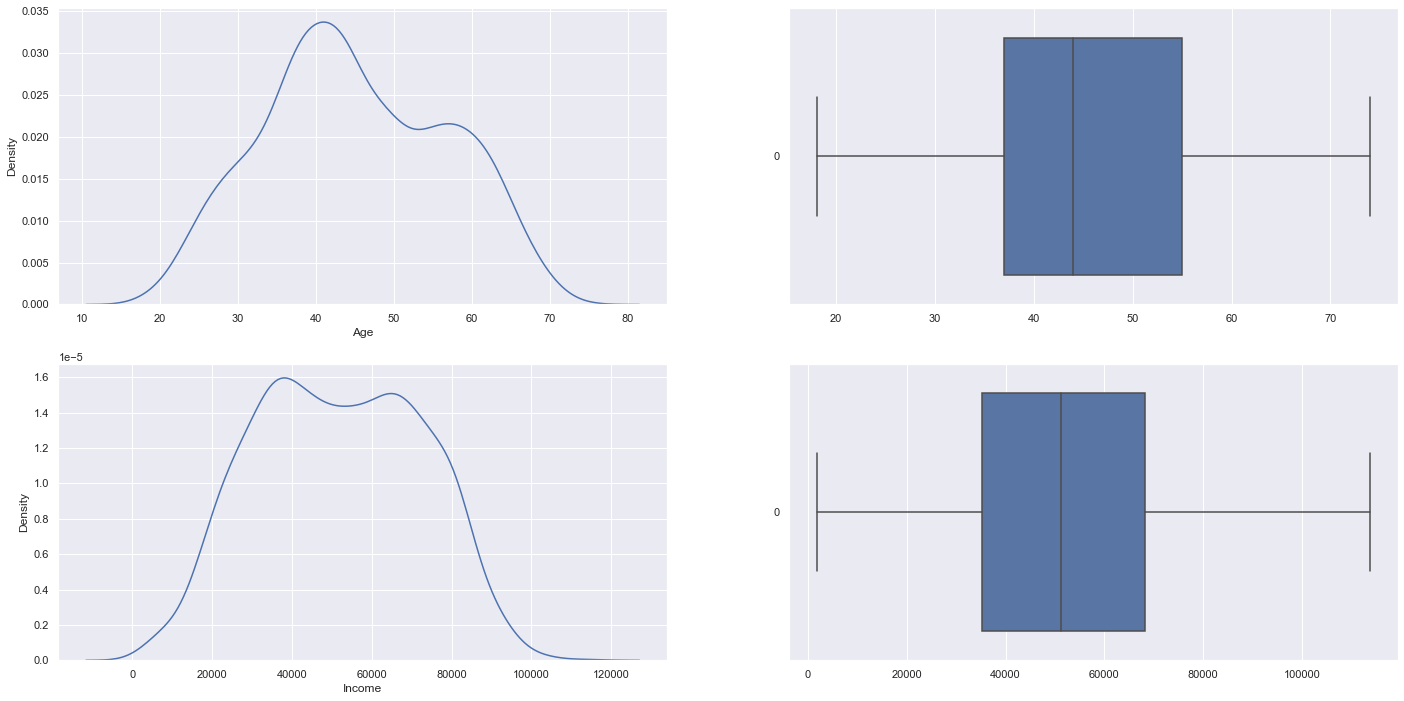

In [311]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.kdeplot(data=new_df4.Age, ax=axes[0,0])
sb.boxplot(data=new_df4.Age, ax=axes[0,1], orient="h")
sb.kdeplot(data=new_df4.Income, ax=axes[1,0])
sb.boxplot(data=new_df4.Income, ax=axes[1,1], orient="h")

In [365]:
new_df4.shape

(2198, 17)

<br>
<br>

## 2. Amount Spent on the various products (Response Variables)
Next, lets explore the amount spent on the various products that our mall offers

Text(0, 0.5, 'MntGoldProds')

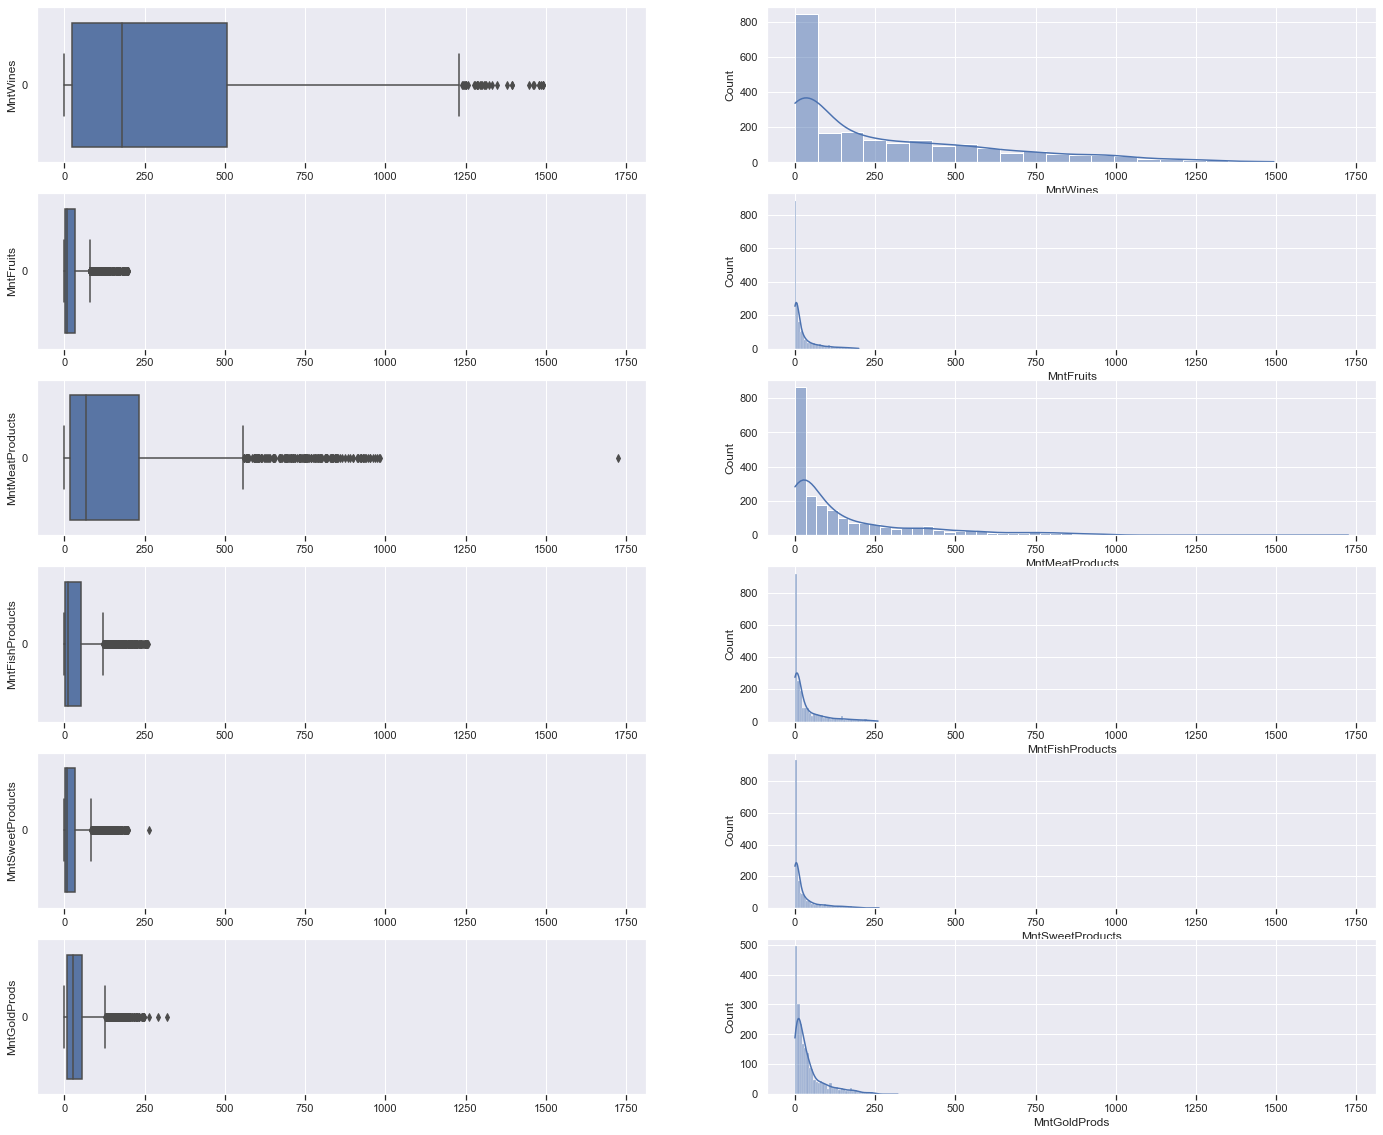

In [313]:

f, axes = plt.subplots(6, 2, figsize=(24, 20), sharex='all', sharey='none')

for a in f.axes:
    a.tick_params(
    axis='x',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,        # where to draw the ticks (same for 'top')
    top=False,
    labelbottom=True)    # labels along the bottom edge are on
    
sb.boxplot(data=new_df4.MntWines, ax=axes[0,0], orient = 'h')
sb.histplot(data=new_df4.MntWines, ax=axes[0,1], kde=True)
axes[0,0].set_ylabel("MntWines")
sb.boxplot(data=new_df4.MntFruits, ax=axes[1,0], orient = 'h')
sb.histplot(data=new_df4.MntFruits, ax=axes[1,1], kde=True)
axes[1,0].set_ylabel("MntFruits")
sb.boxplot(data=new_df4.MntMeatProducts, ax=axes[2,0], orient = 'h')
sb.histplot(data=new_df4.MntMeatProducts, ax=axes[2,1], kde=True)
axes[2,0].set_ylabel("MntMeatProducts")
sb.boxplot(data=new_df4.MntFishProducts, ax=axes[3,0], orient = 'h')
sb.histplot(data=new_df4.MntFishProducts, ax=axes[3,1], kde=True)
axes[3,0].set_ylabel("MntFishProducts")
sb.boxplot(data=new_df4.MntSweetProducts, ax=axes[4,0], orient = 'h')
sb.histplot(data=new_df4.MntSweetProducts, ax=axes[4,1], kde=True)
axes[4,0].set_ylabel("MntSweetProducts")
sb.boxplot(data=new_df4.MntGoldProds, ax=axes[5,0], orient = 'h')
sb.histplot(data=new_df4.MntGoldProds, ax=axes[5,1], kde=True)
axes[5,0].set_ylabel("MntGoldProds")

### Observation

Looking at the bar plots above, we observe that the distributions of the amount spent on the various products are **largely similar except for two of them ("MntWines" and "MntMeatProducts")** where the Interquartile Range (indicating 50% of all datapoints) for both variables are **much larger** (*greater variability*). 

Looking at the histogram plot on the left, we also observe that the height of the bars of the histogram are **markedly higher** for "MntWines" and "MntMeat" compared to the rest of them indicating **higher frequency of all amounts spent on wine and meat**. 

Combining these two points together, we can conclude that **both wine and meat are two goods that generate the greatest profit** for the mall at the time of data collection. 

#### <u>Conclusions drawn

>Knowing this, we will consider giving priority to wine and meat products for the advertisements after the clustring analysis is done.

<br>
Unfortunately as this is the latest data collection that the mall did, we have to assume that the tastes and preferences of the customers remained the same. 

<br>      
    
To statistically show that the distributions of "MntWines" and "MntMeatProducts" are different from the rest, we did a **T-test** between each of the variables as seen in the heatmaps below.
  

    
#### <u>Statistical way of illustrating the above

<AxesSubplot:>

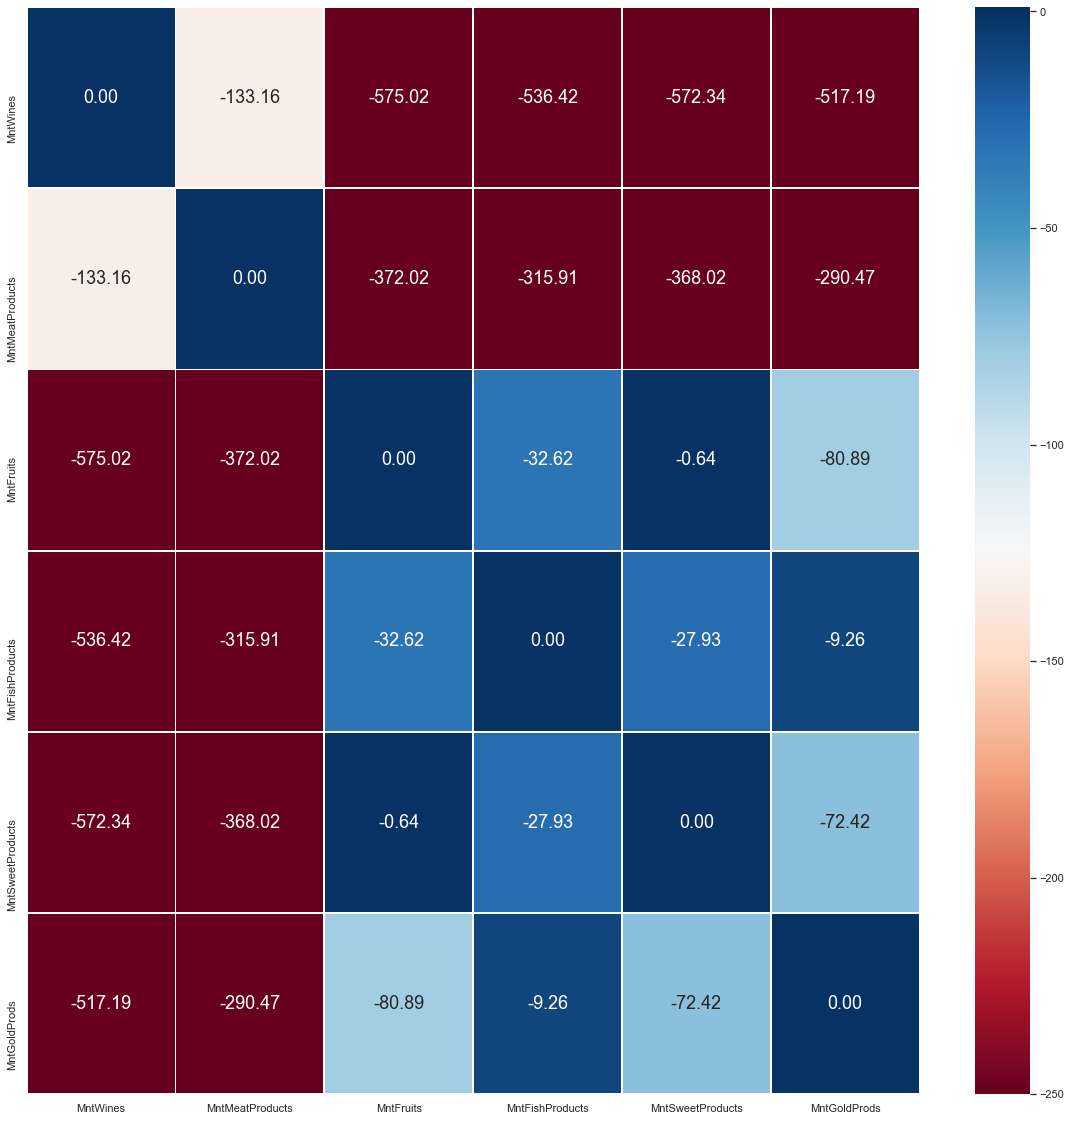

In [425]:
import math
import scipy.stats as stats
f = plt.figure(figsize=(20, 20))

variables = ["MntWines", "MntMeatProducts", "MntFruits", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
y_axis_labels = variables
ttest_scores = []
for i in variables:
    temp = []
    for j in variables:
        temp.append(math.log(stats.ttest_ind(new_df4[i], new_df4[j], equal_var=False)[1]))
    ttest_scores.append(temp)
ttest_scores = pd.DataFrame(ttest_scores, columns=variables)

sb.heatmap(ttest_scores, vmin = -250, vmax = 1, linewidths = 1,
annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu", yticklabels=variables)

#### <u>Explanation of the above
*T-test determines whether 2 sets of data are significantly different from each other*. The above heatmaps display the p-values from the T-test of the amount spent on each product (e.g. "MntWines") against each other. The lower the p-values, the more different the 2 datasets are. Since each of these products are very different, the **p-values are very small**. We take the **logarithm** of each p-value to better show the values. After taking the logarithm of each p-value, **a very negative value just indicates a very small p-value** and hence the distributions of the two variables used in the T-test are **very different** from each other.

#### <u>Conclusions Drawn 
We can see from the heatmap above that when comparing the 4 variables ["MntFruits", "MntFishProducts", "MntSweetProducts", "MntGoldProds"] against one another, the p-values are **not as small as when comparing any of these 4 against either "MntWines" or "MntMeatProducts"** (As seen from the dark red coloured portions of the heatmap). Hence this show that **the distributions of "MntWines" and "MntMeatProducts" are indeed very different** and higher than the 4 other variables.

<br>

## 3. Number of Purchases on the Various Platforms and Number of Web visits (Response Variables)
Now, we will explore these discrete numerical variables

Text(0.5, 0, 'NumCatalogPurchases')

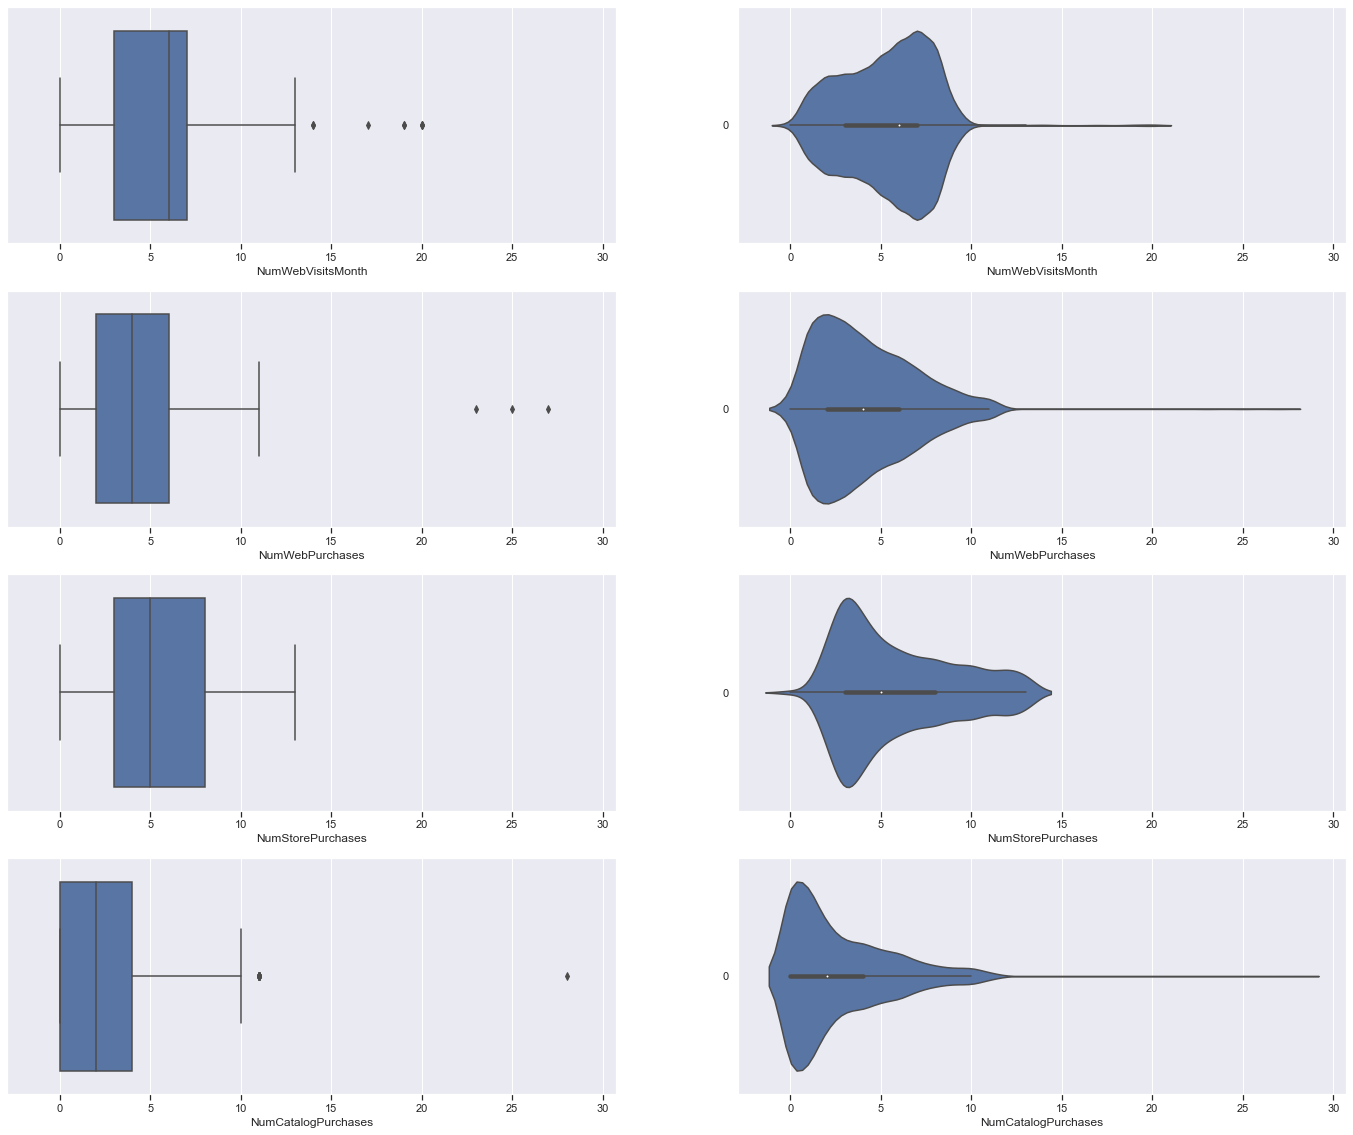

In [25]:
f, axes = plt.subplots(4, 2, figsize=(24, 20), sharex='all', sharey='none')

for a in f.axes:
    a.tick_params(
    axis='x',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,        # where to draw the ticks (same for 'top')
    top=False,
    labelbottom=True)    # labels along the bottom edge are on

sb.boxplot(x = "NumWebVisitsMonth", data = new_df4, orient = "h", ax=axes[0][0])
sb.boxplot(x = "NumWebPurchases", data = new_df4, orient = "h", ax=axes[1][0])
sb.boxplot(x = "NumStorePurchases", data = new_df4, orient = "h", ax=axes[2][0])
sb.boxplot(x = "NumCatalogPurchases", data = new_df4, orient = "h", ax=axes[3][0])
sb.violinplot(data=new_df4.NumWebVisitsMonth, ax=axes[0][1], orient='h')
axes[0][1].set_xlabel("NumWebVisitsMonth")    
sb.violinplot(data=new_df4.NumWebPurchases, ax=axes[1][1], orient='h')
axes[1][1].set_xlabel("NumWebPurchases")
sb.violinplot(data=new_df4.NumStorePurchases, ax=axes[2][1], orient='h')
axes[2][1].set_xlabel("NumStorePurchases")
sb.violinplot(data=new_df4.NumCatalogPurchases, ax=axes[3][1], orient='h')
axes[3][1].set_xlabel("NumCatalogPurchases")



### Observation

Looking at the violin plots above, we can tell that the **purchasing from physical stores is most prefered, followed by purchasing through the website, then purchasing through the catalog.** We can tell this from the **interquartile range** of the box plot which consists of 50% of all datapoints. 
(*looking at the IQR from right to left horizontally, the order is "NumStorePurchases"->"NumWebPurchases"->"NumCatalogPurchases"*). 

Furthermore, we can confirm this by observing the **kernel density estimate** of the violin plot. 

Looking at the KDE, the mode (peak of KDE) of each of the distributions are in the same order that we noted. In addition, NumStorePurchases has **the most noticeable frequency of purchases for number of purchases greater than around 7 while that of "NumWebPurchases" seem to be lower, followed by "NumCatalogPurchases"**. 

#### Conclusions Drawn

> Based on this, it seems as though advertisements should focus on encouraging people to purchase the mall's products from physical stores. However, it may be too early to tell as we do not know the prefered mode of purchasing of the customers in our clusters. 



<br>
<br>

# <u>Bi-Variate Exploration  (Clustering Features against Response Variables)</u>
To explore any possible relationships between "Income" and "Age" with the numerical response variables, we did a pairplot and correlation matrix.
<br>

## 1. Income and Age against Numerical Response Variables

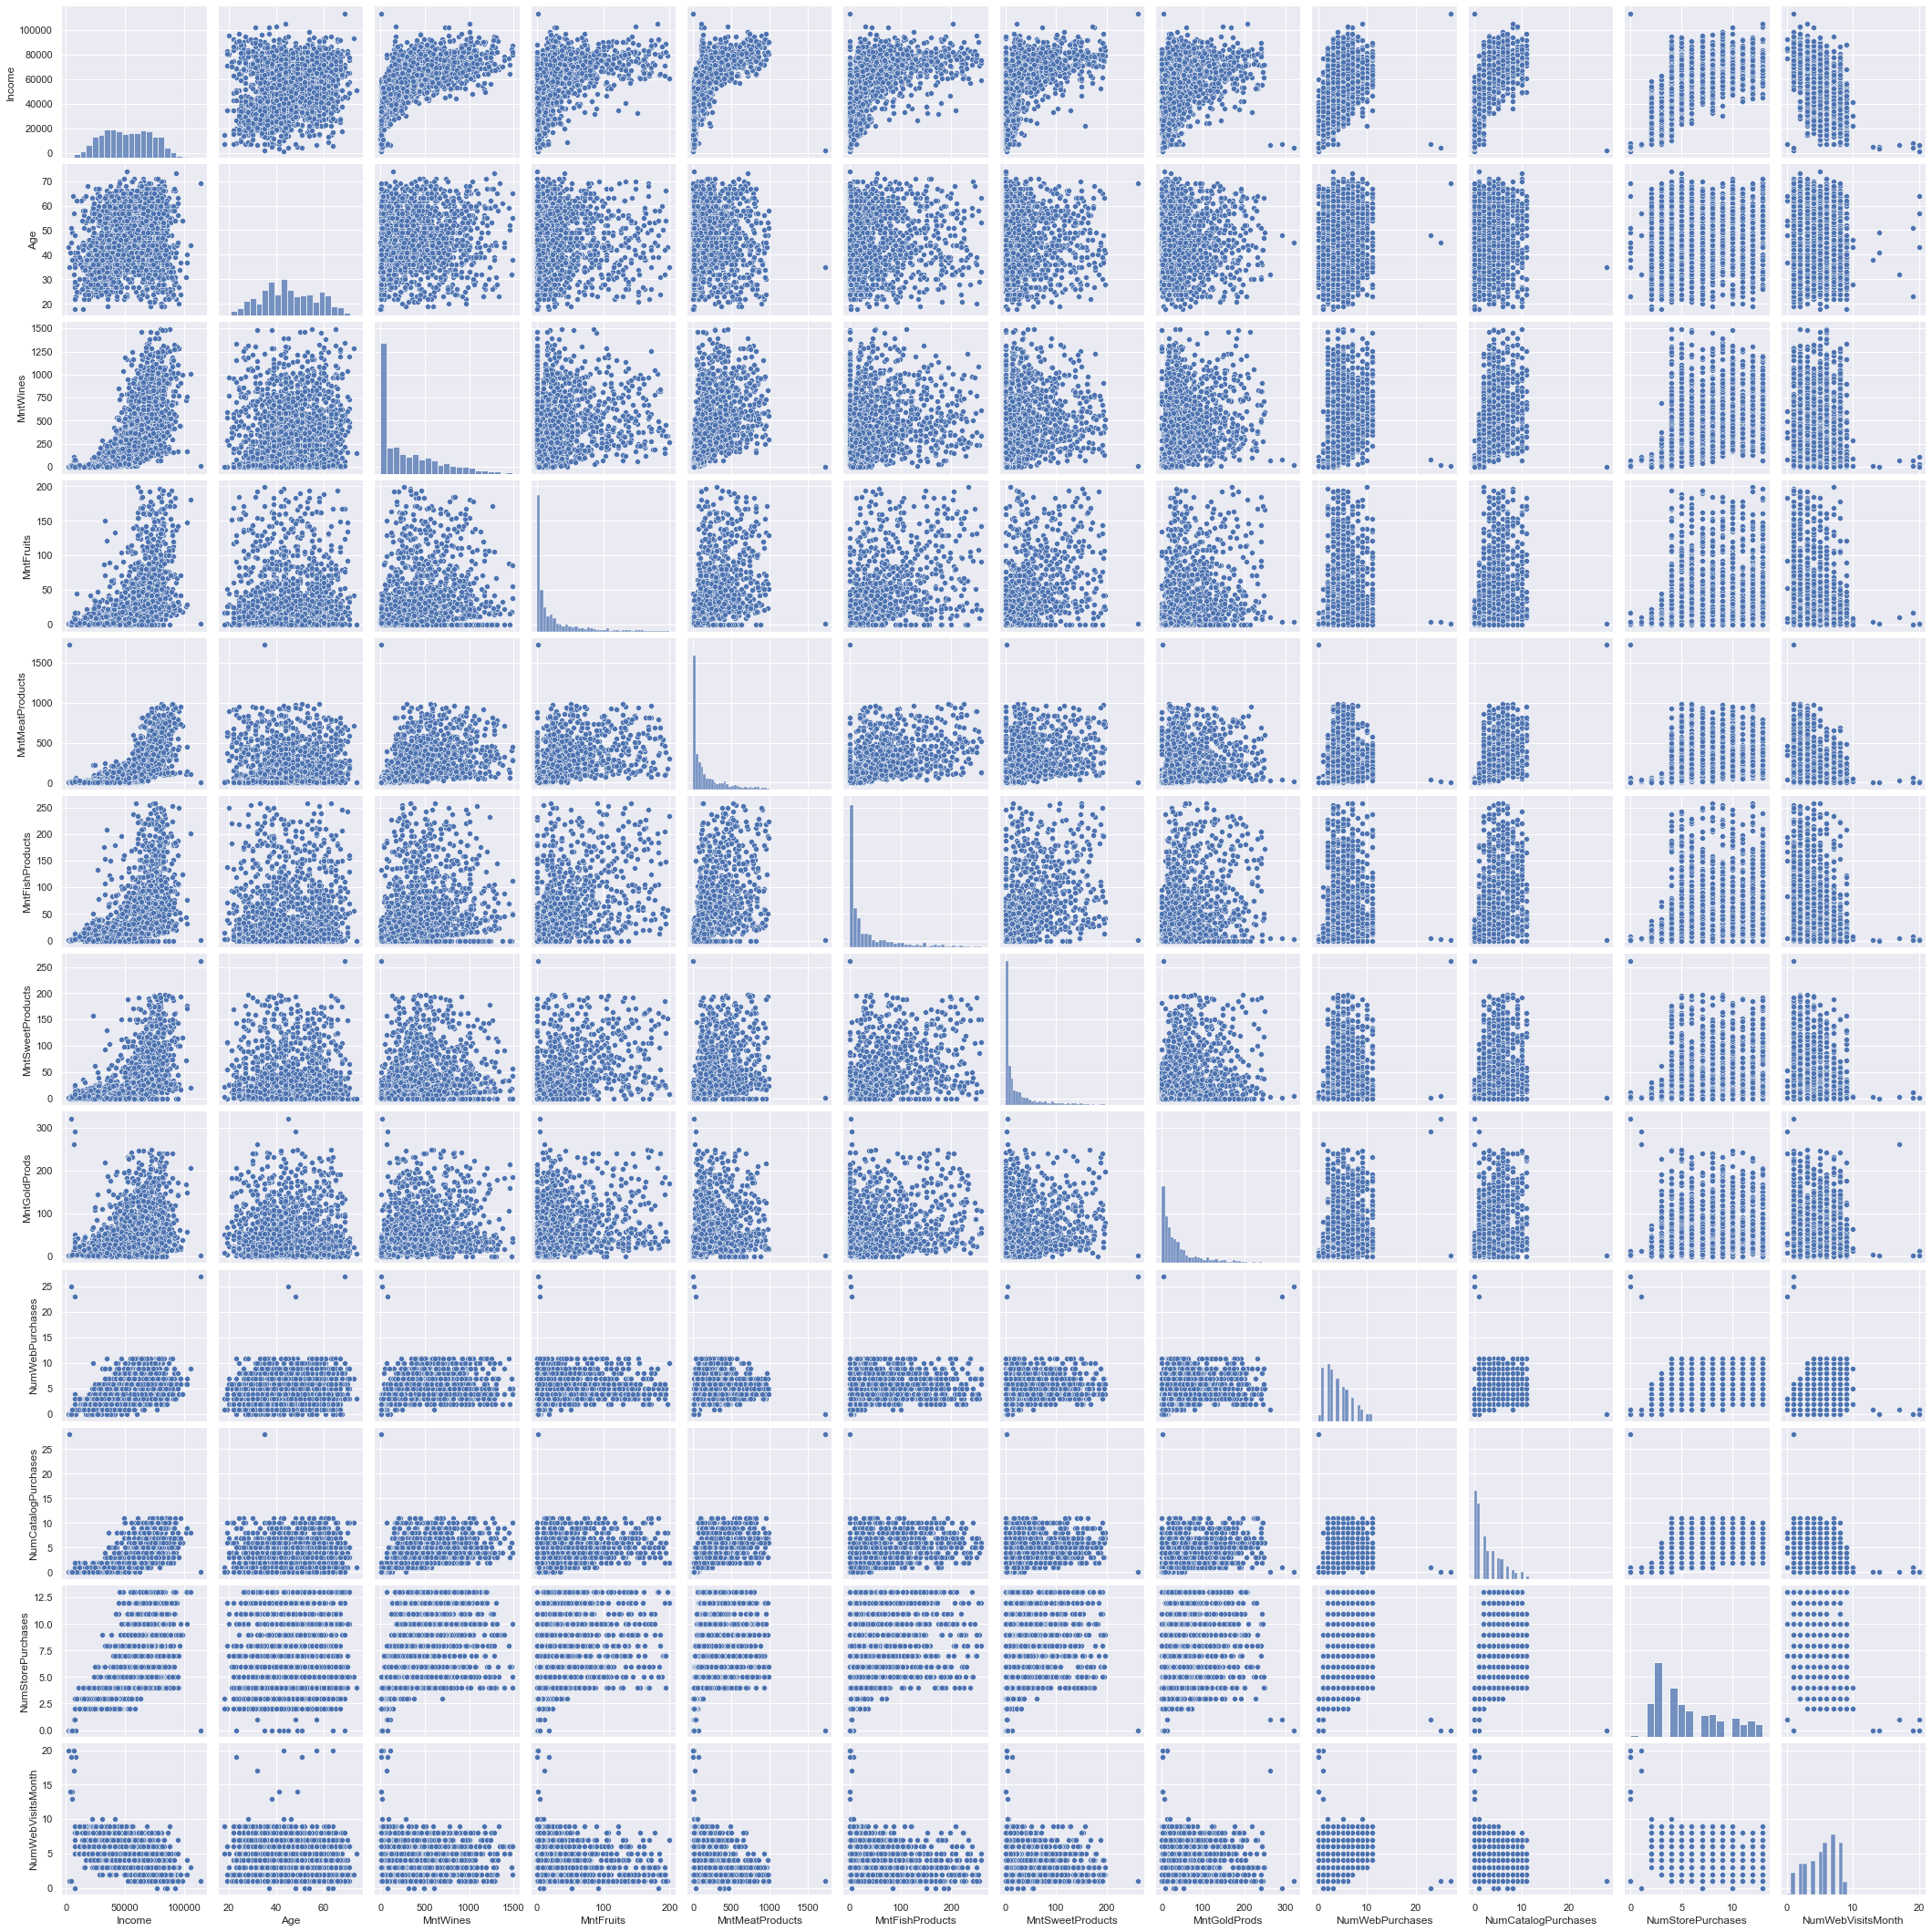

In [422]:
numeric_data = pd.DataFrame(new_df4[["Income", "Age", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]])
sb.pairplot(data = numeric_data)

<AxesSubplot:>

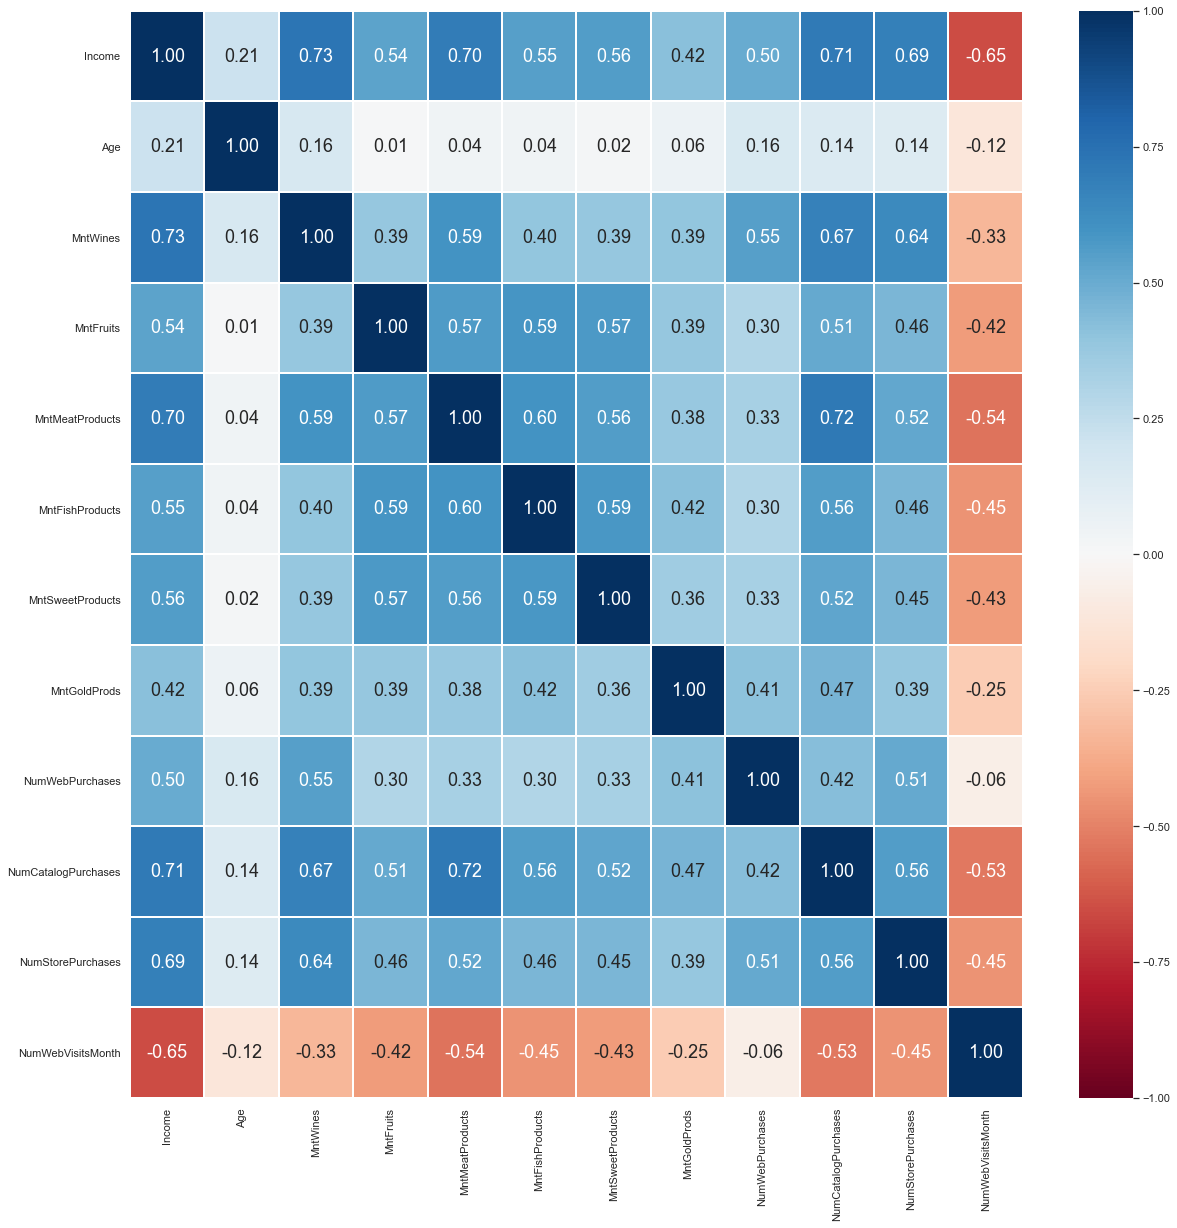

In [423]:
f = plt.figure(figsize=(20, 20))

sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Observation
#### <u>Spending on various products
For **"Income"**, there is a **moderate positive correlation with all products except for Meat and Wine**. This can be evinced from how the correlation coefficient varies between 0.42 ("Income" and "MntGold") and 0.56 ("Income" and "MntSweetProducts"). 
    
Notably, **"Income" has the highest positive correlation with the amount spent on Wine products ("MntWines") followed by Meat products ("MntMeatProducts")** with a correlation score of 0.73 and 0.70 respectively. This true as Wine is usually classified as a luxurious good that are affordable to the rich. For Meat products, it is in line with global observations where meat consumption tends to increase with higher income. 

However, it seems that **"Age"** has a **weak or almost negligible correlation** with the amount spent on all products given how the correlation coefficient are between 0.01 ("Age" and "MntFruits") and 0.16 ("Age" and "MntWines").

  
<br> 

#### <u>Method of purchase & Number of Website Visits
Also, it is interesting to note that **number of web visits ("NumWebVisitsMonth" has a negative correlation with "Income"** (correlation of -0.65) while there is rather **high correlation between number of Store and Catalogue purchases ("NumStorePurchases" and "NumCatalogPurchases") with "Income"** (correlation 0.69 and 0.71 respectively). 
    
For "Age", it is similar to above where there is a **weak or negligible correlation between "Age" and the various response variables**. This can be seen from how all the correlation coefficient magnitudes are in the range of 0.01 ("Age" and "MntFruits") and 0.14 ("Age" and ""NumStorePurchases").


#### <u>Things to Note
Note that correlation between "Income" and "Age" does not make any sense. Correlation between the response variables do not make any sense too except for between "NumOfWebVisitsMonth" and "NumOfWebPurchases". However, the correlation is extremely weak (-0.06) and insignificant.

<br>
<br>

## 2. Income and Age against Receptiveness (Categorical Response variable)

<AxesSubplot:xlabel='Age', ylabel='Receptiveness'>

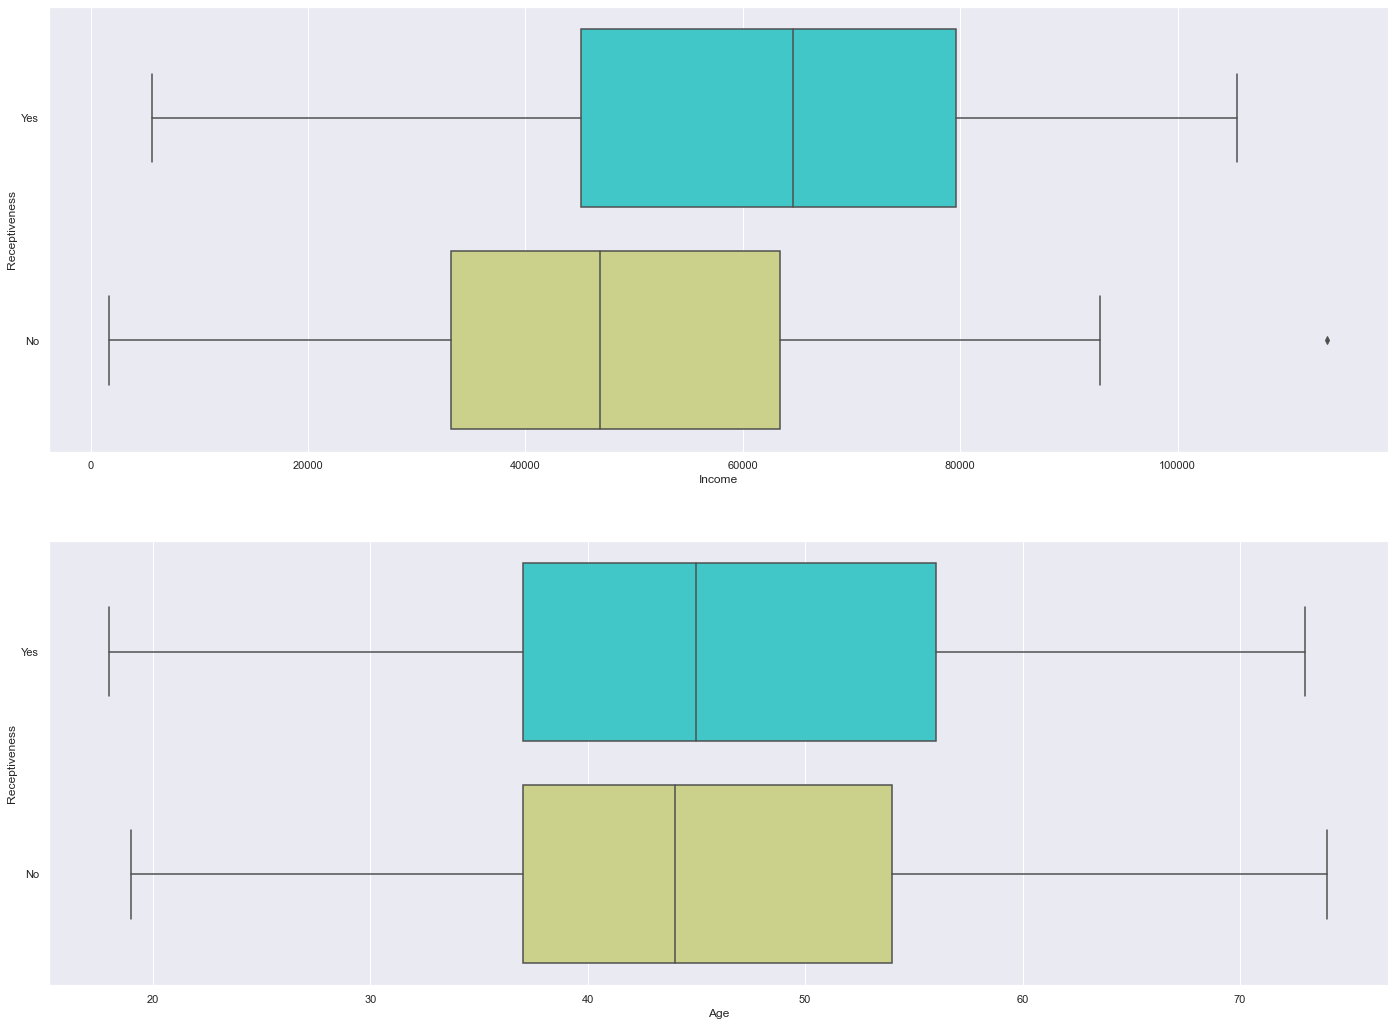

In [318]:
f, axes = plt.subplots(2, 1, figsize=(24, 18))

sb.boxplot(x='Income', y='Receptiveness', data=new_df4, palette='rainbow', ax=axes[0])
sb.boxplot(x='Age', y='Receptiveness', data=new_df4, palette='rainbow', ax=axes[1])

### Observations

#### <u>Income and Receptiveness
As seen from the first subplot, we can conclude that people earning higher income tend to be more receptive to promotions. This is seen from how the Interquartile range and the median of the blue boxplot representing "Yes" is to the right of that of the green boxplot representing "No". 


#### <u>Age and Receptiveness
However, as seen in the second subplot, it seems that the relationship between "Age" and "Receptiveness" is weak. This can be seen from a largely similar Interquartile range and median between both blue and green boxplots.


#### <u>Conclusions drawn
> People with higher income are more receptive to promotions. Therefore, advertisements for goods that are more likely to be purchased by people of higher income should have include some form of promotion. 

<br>
<br>


### Should we still keep age as a feature for clustering?
As seen from the bi-variate analysis above, it seems as though **"Age" has a very weak or negligible relationship with all of our response variables**. 

Howevever, **designs of advertisements vary according to the age group of the target audience**. Hence, we still decided to keep "Age" as a feature for clustering as clustering based on "Age" could help us design more effective advertisements that are more appealing to the appropriate age group of each cluster.

<br>
<br>
<br>

---

# *Categorical Variables*
<br>

# <u>Uni-variate Exploration</u>

## 1. Kidhome, Teenhome, Education, Marital Status (Clustering Features)

### Decoding Kidhome and Teenhome
As noted earlier, Kidhome and Teenhome are discrete numerical variables that are not compatible with K-Prototypes.
Therefore, we decided to treat them as categorical variables and decoded them in the following manner. This would allow K-Modes model of K-Prototypes to cluster the data with respect to these clustering features.

> 0 -> zero

> 1 -> one

> 2 -> two


In [319]:
new_df4['Kidhome'] = new_df4['Kidhome'].replace([0,1,2], ['zero', 'one', 'two'])
new_df4['Teenhome'] = new_df4['Teenhome'].replace([0,1,2], ['zero', 'one', 'two'])
new_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2205 non-null   int64  
 1   Education            2205 non-null   object 
 2   Marital_Status       2205 non-null   object 
 3   Income               2205 non-null   float64
 4   Kidhome              2205 non-null   object 
 5   Teenhome             2205 non-null   object 
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumWebPurchases      2205 non-null   int64  
 13  NumCatalogPurchases  2205 non-null   int64  
 14  NumStorePurchases    2205 non-null   int64  
 15  NumWebVisitsMonth    2205 non-null   i

As seen above, Kidhome and Teenhome are now of *object type*

<br>

### Checking for Imbalances within clustering features
Before proceeding to the analysis of these categorical variables, it is imperative for us to first determine if these categorical variables are imbalanced. This is so as any imbalances may cause our analysis to be inaccurate since the distributions may not reflect the true distributions and are unreliable.

<br>

Kidhome:
zero    1276
one      883
two       46
Name: Kidhome, dtype: int64

Teenhome:
zero    1139
one     1015
two       51
Name: Teenhome, dtype: int64

Education:
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

Marital_Status:
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


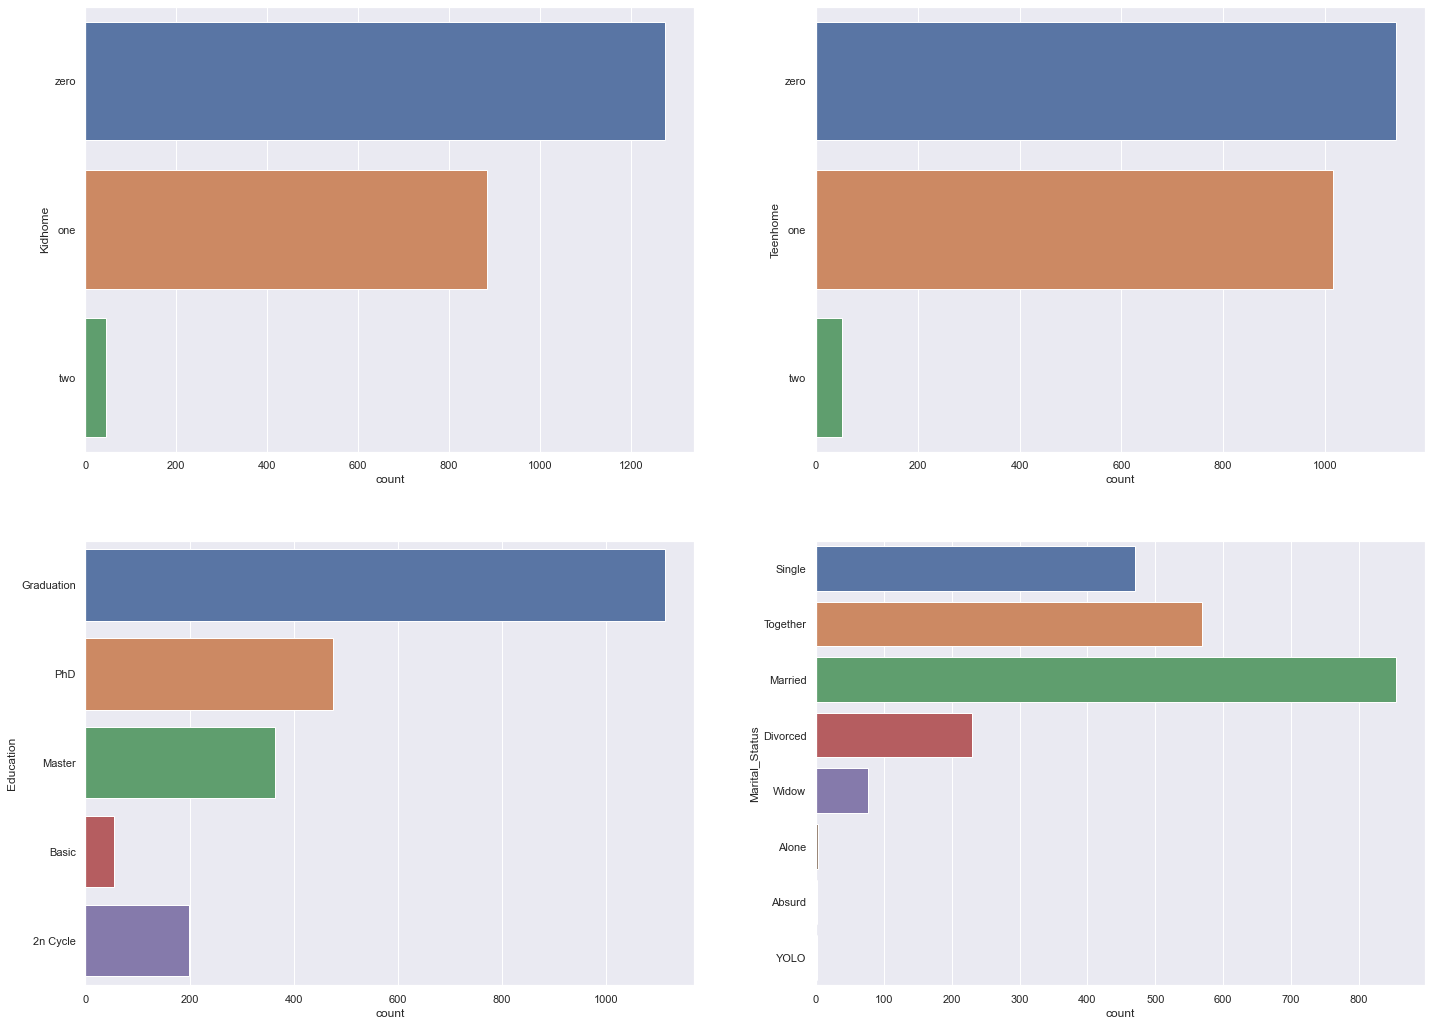

In [320]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 18))
sb.countplot(y='Kidhome', data=new_df4, ax=axes[0,0])
sb.countplot(y='Teenhome', data=new_df4,ax=axes[0,1])
sb.countplot(y='Education', data=new_df4, ax=axes[1,0])
sb.countplot(y='Marital_Status', data=new_df4,ax=axes[1,1])

#Individual counts
print(f"Kidhome:\n{new_df4.Kidhome.value_counts()}")
print()
print(f"Teenhome:\n{new_df4.Teenhome.value_counts()}")
print()
print(f"Education:\n{new_df4.Education.value_counts()}")
print()
print(f"Marital_Status:\n{new_df4.Marital_Status.value_counts()}")

### Observations

Looking at the above counts for the levels of each categorical data, we made the following observations:

#### <u>Imbalanced data
- For both **"Kidhome" and "Teenhome", counts of category 'two' seems to be very low at 46 and 51 counts respectively**. This is only **2.03%** and **2.30%** of all data for "Kidhome" and "Teenhome" respectively. This would render the distributions for the various response variables for "Kidhome" 'two' and "Teenhome" 'two' **unreliable** since they **may not be reflective of the actual distributions**. For subsequent observations, it **may be more meaningful to compare the distributions of the response variables between having Kids/Teens and not having Kids/Teens**. Hence, we proceded to combine Kidhome 'one' and 'two', Teenhome 'one' and 'two', into "Kidhome" 'Have Kids' and "Teenhome" 'Have Teens' respectively.
<br>

- For "Education", **'Basic' seems to be the minority class too with only 54 counts**. That only represents **2.44%** of all datapoints. On the other hand, **'Graduation' is the majority class that account for 50.4% of all datapoints** although there are 5 different levels of "Education". Hence, due to this imbalance, **comparisons of distributions of response variables between 'Basic' and other levels may not be meaningful too**.


- Lastly, for "Marital_Status", counts for **'Widow' also seem very low with only 76 data points (3.43%)** followed by **'Divorced' with only 230 data points (10.4%)**.



#### <u>Weird levels for Marital Status
Apart from the standard Marital Statuses, we observe three more: **'Absurd', 'Alone', 'YOLO'**.
As these three levels only account for **0.3%** of the entire dataset **(0.14%, 0.09%, 0.09% respectively)**, and we **do not know which of the other categories these datapoints actually belong to** (for instance, 'Alone' could mean 'Single', 'Divorced' or 'Widow'), we decided to drop them.

<br>

### Resolving the necessary changes
#### <u>Combining 'one' and 'two' of Kidhome and Teenhome into a single level called 'Have Kids/Teens"

In [321]:
new_df4['Kidhome'] = new_df4['Kidhome'].replace(['zero', 'one', 'two'], ['No Kids','Have Kids', 'Have Kids'])
new_df4['Teenhome'] = new_df4['Teenhome'].replace(['zero', 'one', 'two'], ['No Teens','Have Teens', 'Have Teens'])

In [322]:
# Showing that Kidhome is no longer imbalanced
new_df4.Kidhome.value_counts()

No Kids      1276
Have Kids     929
Name: Kidhome, dtype: int64

In [323]:
# Showing that Teenhome is no longer imbalanced
new_df4.Teenhome.value_counts()

No Teens      1139
Have Teens    1066
Name: Teenhome, dtype: int64

#### <u>Dropping rows with Marital Status 'YOLO', 'Alone', 'Absurd'

In [324]:
new_df4 = new_df4.drop(new_df4[new_df4.Marital_Status=='YOLO'].index)
new_df4 = new_df4.drop(new_df4[new_df4.Marital_Status=='Alone'].index)
new_df4 = new_df4.drop(new_df4[new_df4.Marital_Status=='Absurd'].index)

# Reset Index
new_df4.reset_index(drop=True, inplace=True)

In [325]:
new_df4.Marital_Status.value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Name: Marital_Status, dtype: int64

In [326]:
new_df4.shape

(2198, 17)

<br>
<br>

## 2. Receptiveness (Response Variable)

Receptiveness:
No     1597
Yes     601
Name: Receptiveness, dtype: int64


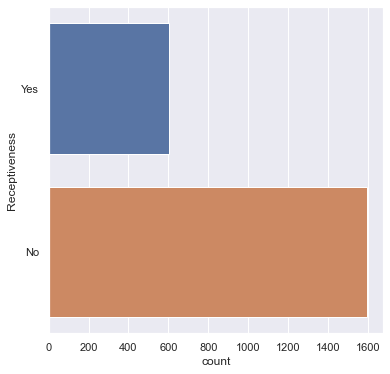

In [370]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 1, figsize=(6, 6))
sb.countplot(y='Receptiveness', data=new_df4)


#Individual counts
print(f"Receptiveness:\n{new_df4.Receptiveness.value_counts()}")

### Observations

From the above countplot, we can see that **"Receptiveness" is rather imbalanced** with much more data points having 'No' than 'Yes' (the number of data points with 'No', 1597, is more than double the number of data points with 'Yes' - imbalance ratio greater than 2:1). This means that the **general crowd is generally more unreceptive towards promotions**.

However, since **this is a response variable** and not a clustering feature, we can still explore the relationship between each of the clustering features with Receptiveness.

<br>
<br>
<br>

# <u>Bi-Variate Exploration (Categorical Features) & Feature Selection</u>

To explore any possible relationships between each of the categorical variables and the response variables, we did a bi-variate exploration for each of the categorical variables

## 1. Kidhome against response variables

Kidhome:
No Kids      1272
Have Kids     926
Name: Kidhome, dtype: int64


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Kidhome'>

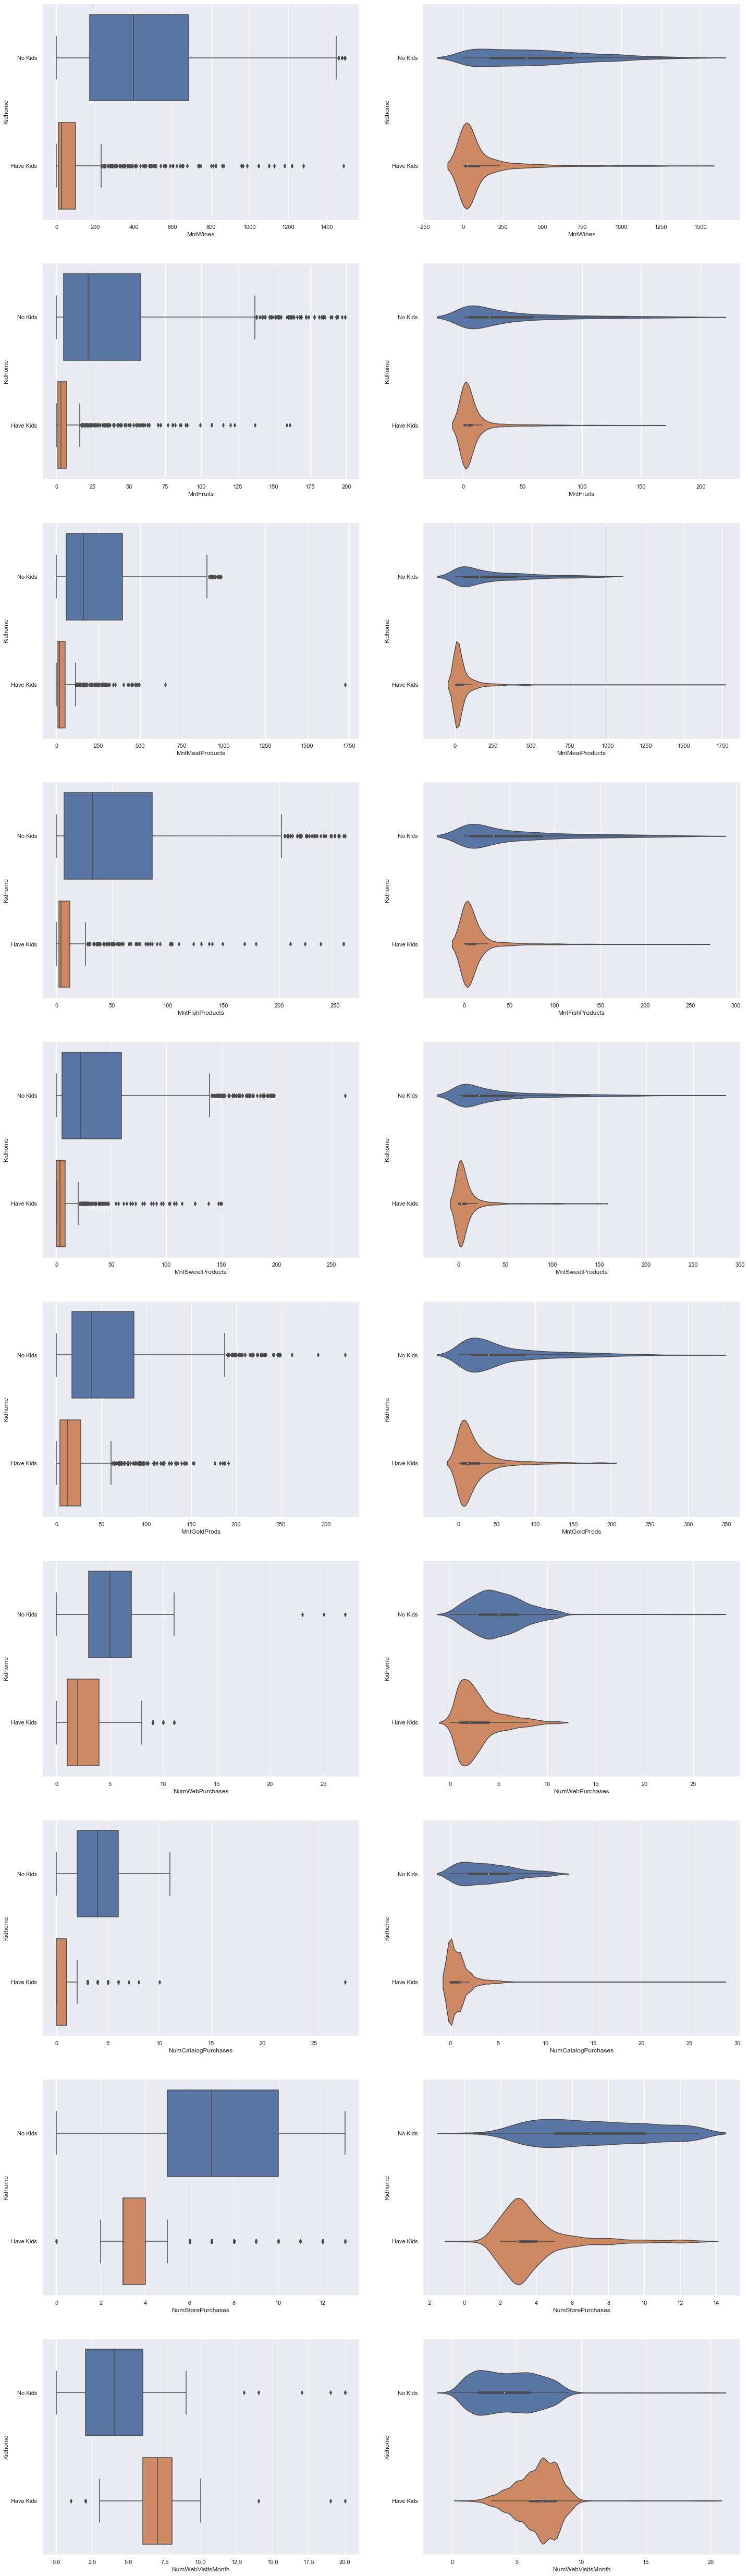

In [396]:
# Boxplot of  Kidhome against response variables
print(f"Kidhome:\n{new_df4.Kidhome.value_counts()}")
f, axes = plt.subplots(10, 2, figsize=(24, 90))
sb.boxplot(x = "MntWines", y = "Kidhome", data = new_df4, orient = "h", ax=axes[0][0])
sb.boxplot(x = "MntFruits", y = "Kidhome", data = new_df4, orient = "h", ax=axes[1][0])
sb.boxplot(x = "MntMeatProducts", y = "Kidhome", data = new_df4, orient = "h", ax=axes[2][0])
sb.boxplot(x = "MntFishProducts", y = "Kidhome", data = new_df4, orient = "h", ax=axes[3][0])
sb.boxplot(x = "MntSweetProducts", y = "Kidhome", data = new_df4, orient = "h", ax=axes[4][0])
sb.boxplot(x = "MntGoldProds", y = "Kidhome", data = new_df4, orient = "h", ax=axes[5][0])
sb.boxplot(x = "NumWebPurchases", y = "Kidhome", data = new_df4, orient = "h", ax=axes[6][0])
sb.boxplot(x = "NumCatalogPurchases", y = "Kidhome", data = new_df4, orient = "h", ax=axes[7][0])
sb.boxplot(x = "NumStorePurchases", y = "Kidhome", data = new_df4, orient = "h", ax=axes[8][0])
sb.boxplot(x = "NumWebVisitsMonth", y = "Kidhome", data = new_df4, orient = "h", ax=axes[9][0])
sb.violinplot(x = "MntWines", y = "Kidhome", data = new_df4, orient = "h", ax=axes[0][1])
sb.violinplot(x = "MntFruits", y = "Kidhome", data = new_df4, orient = "h", ax=axes[1][1])
sb.violinplot(x = "MntMeatProducts", y = "Kidhome", data = new_df4, orient = "h", ax=axes[2][1])
sb.violinplot(x = "MntFishProducts", y = "Kidhome", data = new_df4, orient = "h", ax=axes[3][1])
sb.violinplot(x = "MntSweetProducts", y = "Kidhome", data = new_df4, orient = "h", ax=axes[4][1])
sb.violinplot(x = "MntGoldProds", y = "Kidhome", data = new_df4, orient = "h", ax=axes[5][1])
sb.violinplot(x = "NumWebPurchases", y = "Kidhome", data = new_df4, orient = "h", ax=axes[6][1])
sb.violinplot(x = "NumCatalogPurchases", y = "Kidhome", data = new_df4, orient = "h", ax=axes[7][1])
sb.violinplot(x = "NumStorePurchases", y = "Kidhome", data = new_df4, orient = "h", ax=axes[8][1])
sb.violinplot(x = "NumWebVisitsMonth", y = "Kidhome", data = new_df4, orient = "h", ax=axes[9][1])

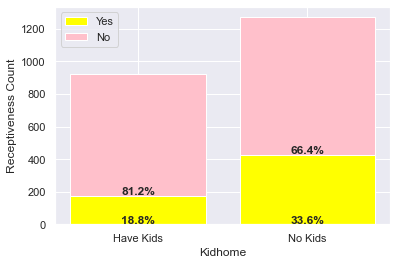

In [416]:
# Stacked bar graph for Kidhome against Responsiveness
counts = new_df4[["Kidhome","Receptiveness","Income"]].groupby(["Kidhome",'Receptiveness']).count()
counts = counts.fillna(0)

counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
levels = counts.index.values

s1 = plt.bar(levels, counts['Yes'], bottom=None, color='yellow', label='Yes')
s2 = plt.bar(levels, counts['No'], bottom=counts['Yes'], color='pink', label='No')
plt.legend()
plt.xlabel("Kidhome")
plt.ylabel('Receptiveness Count')

i=0
for p in s1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+5,
             str((counts["Yes"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1
    
i=0
for p in s2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+5,
             str((counts["No"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1

### Observation
#### <u>Spending on the various products
From the box plots above, it seems that **when there are no kids at home ("Kidhome" 'No Kids'), the amount spent on products (all types) tend to be higher**.
More notably, **people with no kids at home tend to spend more on Wine** as seen from how far the separation between the Interquartile range between the category with no kids (blue boxplot) and the categories with kids (orange boxplot) for "MntWines" compared to that for other products (eg "MntFruits", "MntMeatProducts" ...)


#### <u>Method of purchase & Number of Website Visits
Moreover, the **number of purchases through every method of purchase (store, web, catalog) is also higher when there are no kids at home**. Interestingly, **when there are kids at home, people would tend to visit the online store more** as seen from how the Interquartile range and distribution of 'Have Kids' is to the right of that of 'No Kids' for "NumWebVisitsMonth".

    
#### <u>Receptiveness towards promotions
From the stacked bar graph directly above, it seems **having kids influences one's receptiveness towards promotions** as seen from the increase in the proportion data that are receptive to promotions from 'Have Kids' to 'No Kids' (**18.8% to 33.6%**). Perhaps these people who have kids are more thrifty and are less likely to be won over by discounts and promotions.

    
#### <u>Conclusions drawn
> From this, we know that advertisements from wines should be designed in a way that is catered to people without kids to maximise effectiveness<br>

> We also know that advertisements posted on the website should feature products that are more enticing to people with kids at home.
    
> Lastly, products that are more frequently bought by people without kids should be discounted in the advertisements to encourage more purchases from these people.

<br>
<br>

##  2. Teenhome against response variables

Teenhome:
No Teens      1136
Have Teens    1062
Name: Teenhome, dtype: int64


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Teenhome'>

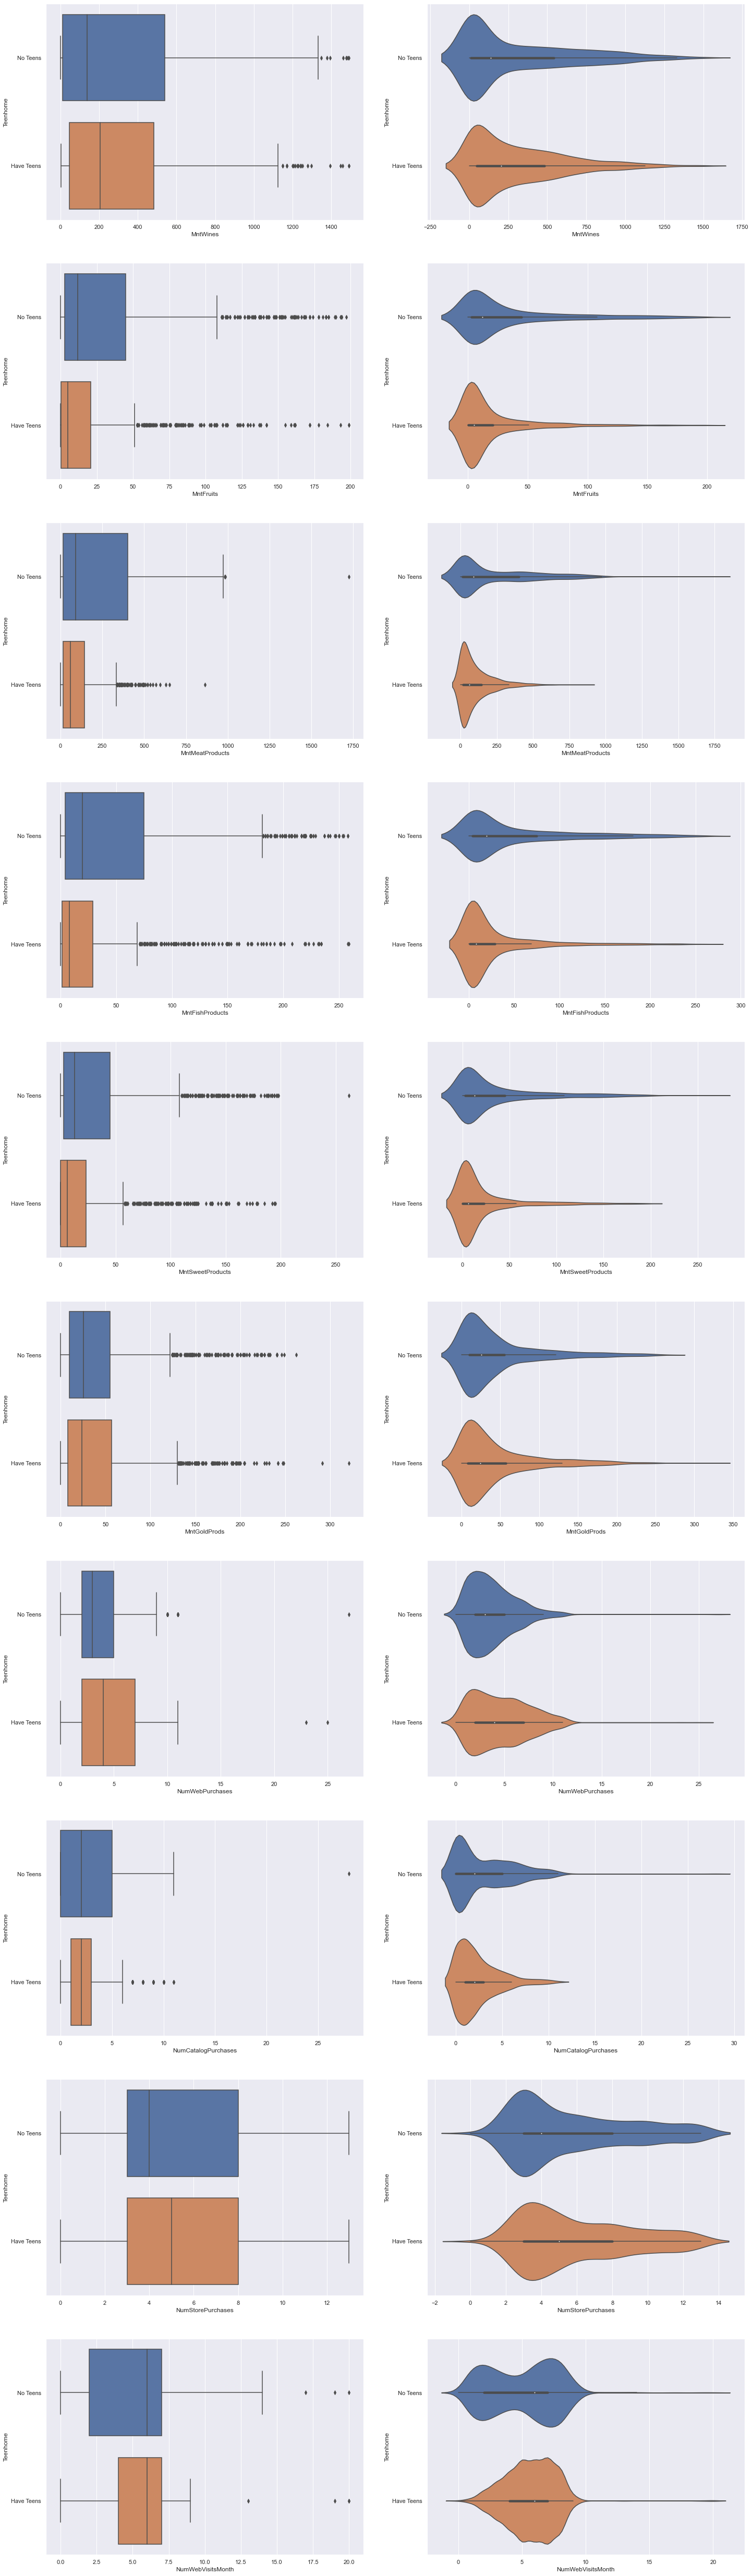

In [328]:
# Boxplot of  Teenhome against response variables
print(f"Teenhome:\n{new_df4.Teenhome.value_counts()}")
f, axes = plt.subplots(10, 2, figsize=(24, 90))
sb.boxplot(x = "MntWines", y = "Teenhome", data = new_df4, orient = "h", ax=axes[0][0])
sb.boxplot(x = "MntFruits", y = "Teenhome", data = new_df4, orient = "h", ax=axes[1][0])
sb.boxplot(x = "MntMeatProducts", y = "Teenhome", data = new_df4, orient = "h", ax=axes[2][0])
sb.boxplot(x = "MntFishProducts", y = "Teenhome", data = new_df4, orient = "h", ax=axes[3][0])
sb.boxplot(x = "MntSweetProducts", y = "Teenhome", data = new_df4, orient = "h", ax=axes[4][0])
sb.boxplot(x = "MntGoldProds", y = "Teenhome", data = new_df4, orient = "h", ax=axes[5][0])
sb.boxplot(x = "NumWebPurchases", y = "Teenhome", data = new_df4, orient = "h", ax=axes[6][0])
sb.boxplot(x = "NumCatalogPurchases", y = "Teenhome", data = new_df4, orient = "h", ax=axes[7][0])
sb.boxplot(x = "NumStorePurchases", y = "Teenhome", data = new_df4, orient = "h", ax=axes[8][0])
sb.boxplot(x = "NumWebVisitsMonth", y = "Teenhome", data = new_df4, orient = "h", ax=axes[9][0])

sb.violinplot(x = "MntWines", y = "Teenhome", data = new_df4, orient = "h", ax=axes[0][1])
sb.violinplot(x = "MntFruits", y = "Teenhome", data = new_df4, orient = "h", ax=axes[1][1])
sb.violinplot(x = "MntMeatProducts", y = "Teenhome", data = new_df4, orient = "h", ax=axes[2][1])
sb.violinplot(x = "MntFishProducts", y = "Teenhome", data = new_df4, orient = "h", ax=axes[3][1])
sb.violinplot(x = "MntSweetProducts", y = "Teenhome", data = new_df4, orient = "h", ax=axes[4][1])
sb.violinplot(x = "MntGoldProds", y = "Teenhome", data = new_df4, orient = "h", ax=axes[5][1])
sb.violinplot(x = "NumWebPurchases", y = "Teenhome", data = new_df4, orient = "h", ax=axes[6][1])
sb.violinplot(x = "NumCatalogPurchases", y = "Teenhome", data = new_df4, orient = "h", ax=axes[7][1])
sb.violinplot(x = "NumStorePurchases", y = "Teenhome", data = new_df4, orient = "h", ax=axes[8][1])
sb.violinplot(x = "NumWebVisitsMonth", y = "Teenhome", data = new_df4, orient = "h", ax=axes[9][1])

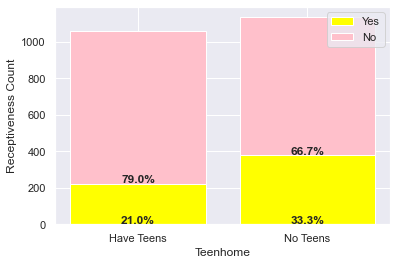

In [417]:
# Stacked bar graph for Teenhome against Responsiveness
counts = new_df4[["Teenhome","Receptiveness","Income"]].groupby(["Teenhome",'Receptiveness']).count()
counts = counts.fillna(0)

counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
levels = counts.index.values

s1 = plt.bar(levels, counts['Yes'], bottom=None, color='Yellow', label='Yes')
s2 = plt.bar(levels, counts['No'], bottom=counts['Yes'], color='Pink', label='No')
plt.legend()
plt.xlabel("Teenhome")
plt.ylabel('Receptiveness Count')

i=0
for p in s1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+5,
             str((counts["Yes"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1
    
i=0
for p in s2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+5,
             str((counts["No"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1

### Observation
#### <u>Spending on the various products
For "Teenhome", we still do see to some extent, **slightly greater spending on food products by people who have no teens at home** as observed from the wider interquartile range of 'No Teens' than 'Have Teens' **but only for some food products** ("MntSweetProducts", "MntMeatProducts", "MntFruits"). The **extent was not as great** as seen in "Kidhome" as the median for boxplots of categories with no teens (blue boxplot) is closer to the median of those categories with teens (orange boxplot).  

Besides, whether or not a person has teens at home, the **amount spent on Gold ("MntGold") seems to be the same** as seen from the almost identical distributions and box plots bewteen 'No Teens' and 'Have Teens'. 

However, it can be noted that unlike what was observed for "Kidhome" for "MntWines", the reverse is true here where **people with teens at home tend to spend slightly more on Wine** as seen from the higher median of the orange boxplot representing 'Have Teens' compared to the median of the blue boxplot representing 'No Teens'. Perhaps the teenagers at home enjoy drinking as well hence accounting for the higher demand of wine.


#### <u>Method of purchase & Number of Website Visits
As for number of purchases on the various platforms and number of website visits, the distributions of both 'No Teens' and 'Have Teens' on each of the relevant response variables **seem to be more or less similar, with the exception of "NumWebVisitsMonth"**. For number of website visits per month, the difference in distribution between 'No Teens' and 'Have Teens' is more apparent. Unlike the distribution of "Have Teens" for this response variable, the distribution of 'No Teens' on this response variable is **clearly bimodal**. This could **indicate two separate groups within the group of customers with no teens** - one group tend to visit the Mall's website more often than the other. Hence although the median of the distribution of both levels for NumWebVisitsMonth are the same, we can still conclude, to some extent, that some people with no kids may visit the mall's website less often than people with kids. **However, since there are also some people with no teens that visit the mall's website as often as people with teens, this conclusion may not be too useful for us**.

    
#### <u>Receptiveness towards Promotions
From the stacked bar graph directly above, it seems **having teens also influences one's receptiveness** towards promotions as seen from the increase in the proportion data that are receptive to promotions from "Have Teens" to "No Teens" (**21.0% to 33.6%**). The increase is not as much as we saw between people with and no kids but nonetheless it is still an increase.
 

#### <u>Conclusions drawn
> Noting the relationship between having kids at home and the amount spent on wine earlier, we can say that advertisements should not only cater to those without children at home but also in a way that it is enticing to both teenagers and adults (not saying that teens should drink - #EthicalConsideration)

> Besides, products that are more frequently bought by people without teens should be discounted in the advertisements to encourage more purchases from these people.


---

## 3. Education against  response variables

Education:
Graduation    1111
PhD            473
Master         362
2n Cycle       198
Basic           54
Name: Education, dtype: int64


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Education'>

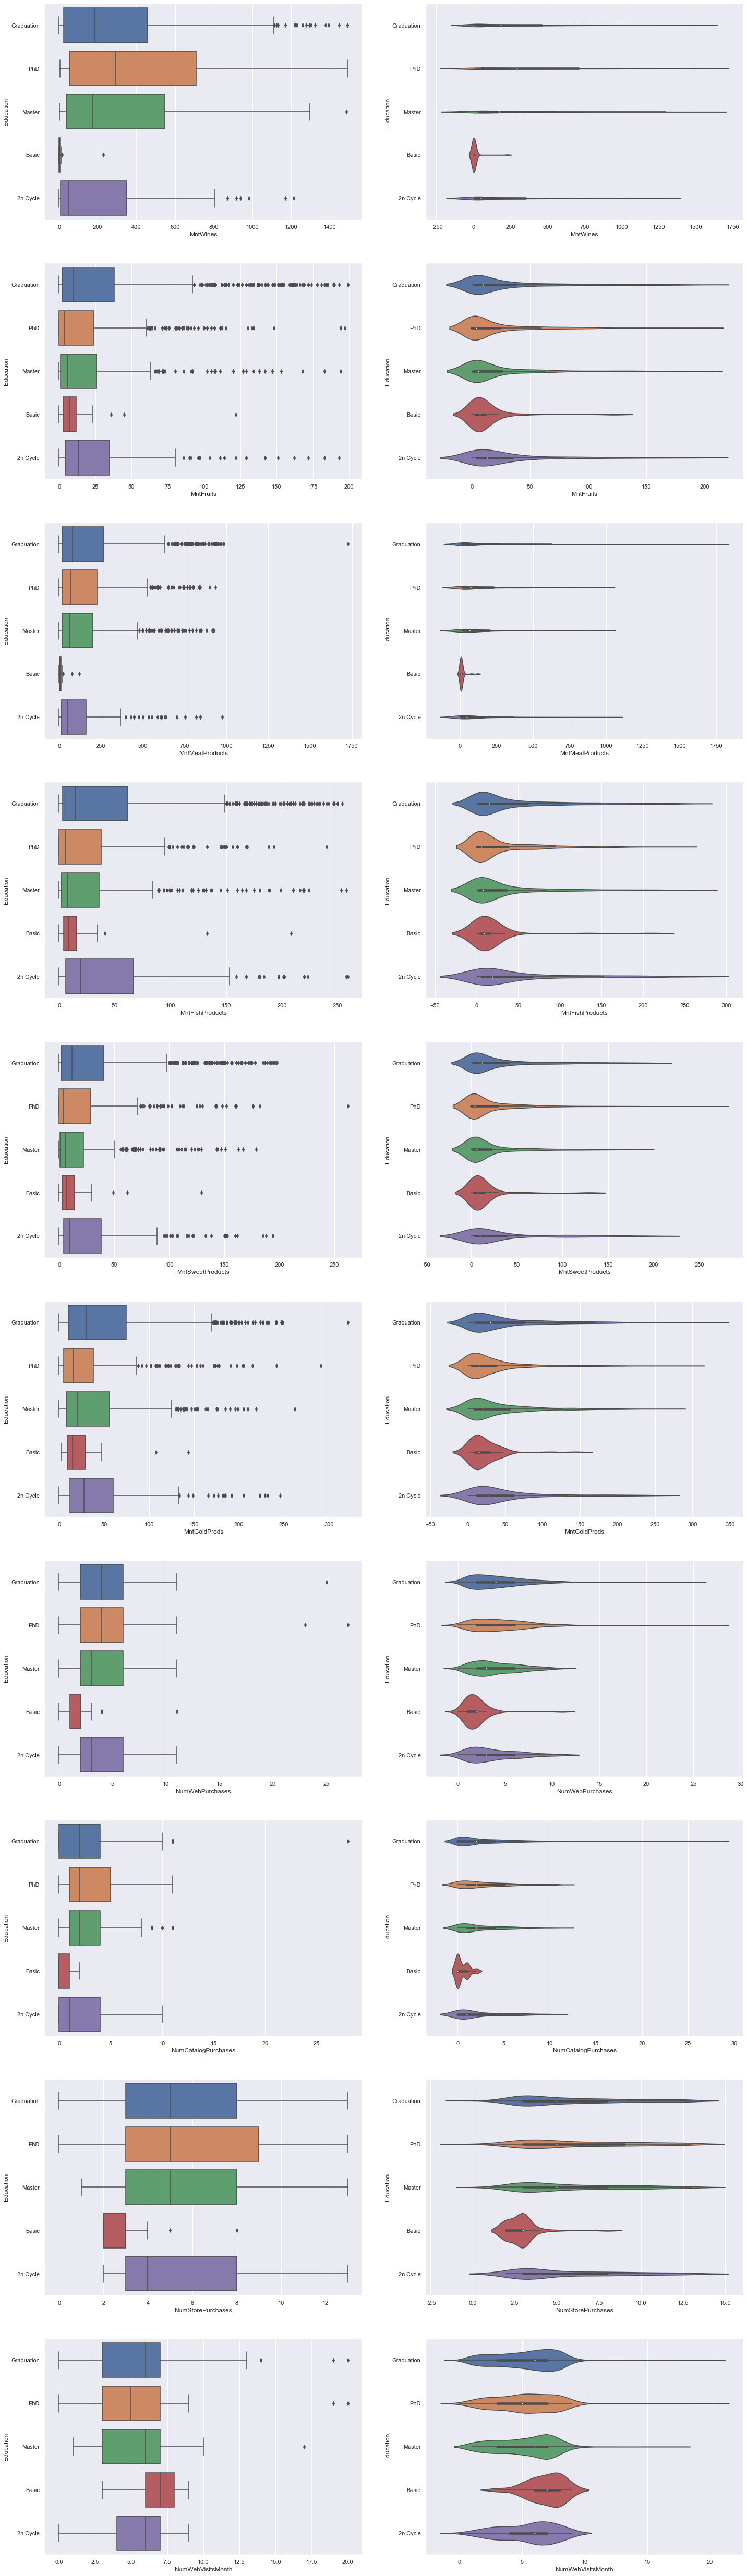

In [329]:
# Boxplot of  Education against response variables
print(f"Education:\n{new_df4.Education.value_counts()}")
f, axes = plt.subplots(10, 2, figsize=(24, 90))
sb.boxplot(x = "MntWines", y = "Education", data = new_df4, orient = "h", ax=axes[0][0])
sb.boxplot(x = "MntFruits", y = "Education", data = new_df4, orient = "h", ax=axes[1][0])
sb.boxplot(x = "MntMeatProducts", y = "Education", data = new_df4, orient = "h", ax=axes[2][0])
sb.boxplot(x = "MntFishProducts", y = "Education", data = new_df4, orient = "h", ax=axes[3][0])
sb.boxplot(x = "MntSweetProducts", y = "Education", data = new_df4, orient = "h", ax=axes[4][0])
sb.boxplot(x = "MntGoldProds", y = "Education", data = new_df4, orient = "h", ax=axes[5][0])
sb.boxplot(x = "NumWebPurchases", y = "Education", data = new_df4, orient = "h", ax=axes[6][0])
sb.boxplot(x = "NumCatalogPurchases", y = "Education", data = new_df4, orient = "h", ax=axes[7][0])
sb.boxplot(x = "NumStorePurchases", y = "Education", data = new_df4, orient = "h", ax=axes[8][0])
sb.boxplot(x = "NumWebVisitsMonth", y = "Education", data = new_df4, orient = "h", ax=axes[9][0])

sb.violinplot(x = "MntWines", y = "Education", data = new_df4, orient = "h", ax=axes[0][1])
sb.violinplot(x = "MntFruits", y = "Education", data = new_df4, orient = "h", ax=axes[1][1])
sb.violinplot(x = "MntMeatProducts", y = "Education", data = new_df4, orient = "h", ax=axes[2][1])
sb.violinplot(x = "MntFishProducts", y = "Education", data = new_df4, orient = "h", ax=axes[3][1])
sb.violinplot(x = "MntSweetProducts", y = "Education", data = new_df4, orient = "h", ax=axes[4][1])
sb.violinplot(x = "MntGoldProds", y = "Education", data = new_df4, orient = "h", ax=axes[5][1])
sb.violinplot(x = "NumWebPurchases", y = "Education", data = new_df4, orient = "h", ax=axes[6][1])
sb.violinplot(x = "NumCatalogPurchases", y = "Education", data = new_df4, orient = "h", ax=axes[7][1])
sb.violinplot(x = "NumStorePurchases", y = "Education", data = new_df4, orient = "h", ax=axes[8][1])
sb.violinplot(x = "NumWebVisitsMonth", y = "Education", data = new_df4, orient = "h", ax=axes[9][1])

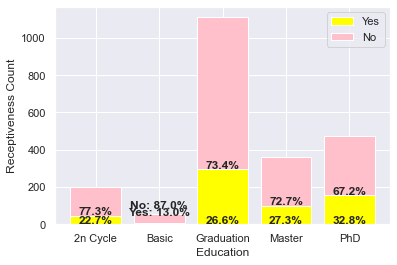

In [424]:
# Stacked bar graph for Education against Responsiveness
counts = new_df4[["Education","Receptiveness","Income"]].groupby(["Education",'Receptiveness']).count()
counts = counts.fillna(0)

counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
levels = counts.index.values

s1 = plt.bar(levels, counts['Yes'], bottom=None, color='Yellow', label='Yes')
s2 = plt.bar(levels, counts['No'], bottom=counts['Yes'], color='Pink', label='No')
plt.legend()
plt.xlabel("Education")
plt.ylabel('Receptiveness Count')

i=0
for p in s1:
    adj = ""
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height<40:
        y += 40
        adj = "Yes: "
     
    plt.text(x+width/2,
             y+5,
             adj+str((counts["Yes"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    if height<40:
        y += 40
        adj = "No: "
    else:
        y += height
        adj = ""
     
    plt.text(x+width/2,
             y+5,
             adj+str((counts["No"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1

### Observations
#### <u>Spending on the various products</u>
Generally, it can be seen that people with **'Basic' Education spend and purchase less overall**. In particular, their spending distribution on wine and meat ("MntWines" and MntMeatPurchases") can be seen to be much **closer to 0** than that of the other education levels. 

#### <u>Method of purchase & Number of Website Visits
Although they spend and purchase the least, people with 'Basic' Education also **visit the online web store most often**. 
    
#### <u>Receptiveness towards promotions
Accross the various levels of "Education", there is **some relationship between "Education" and "Receptiveness" towards promotion**. From the above, we can see that the proportion of data for each of the levels of "Education" that are receptive towards promotion hover between 22.7% (2n Cycle) to 32.8% (PhD) for '2nCycle', 'Graduation', 'Master' and 'PhD' with the exception of 'Basic' which is only 13.0%. Considering that people having a Graduate's degree and above are all highly educated, it can be said that **the higher one's level education, the more receptive one would be towards promotions**.

#### <u>Things to Note
However, it must be noted that **the proportion of data with 'Basic' Education is rather skewed** as mentioned earlier. This could mean that the current distributions may not be reflective of the actual distributions for 'Basic'. Hence, **the above analysis may not hold true**.

Besides, the **other levels of Education can all be considered highly educated enough to make similar spending decisions**. If there were to be a difference, it would more likely be **due to the individual's means and abiliy to spend, not because of one's logical reasoning capabilities** (for instance, one's disposable income would influence his purchasing power and hence spending decisions).

Hence even if clusters are formed based on education differences, any deviation in distributions of the response variables for each cluster would not really be due to differences in education levels but due to other clustering features. Therefore, we **decided not to use Education as a feature in clustering**.

---

## 4. Marital Status against response variables

Marital_Status:
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Name: Marital_Status, dtype: int64


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Marital_Status'>

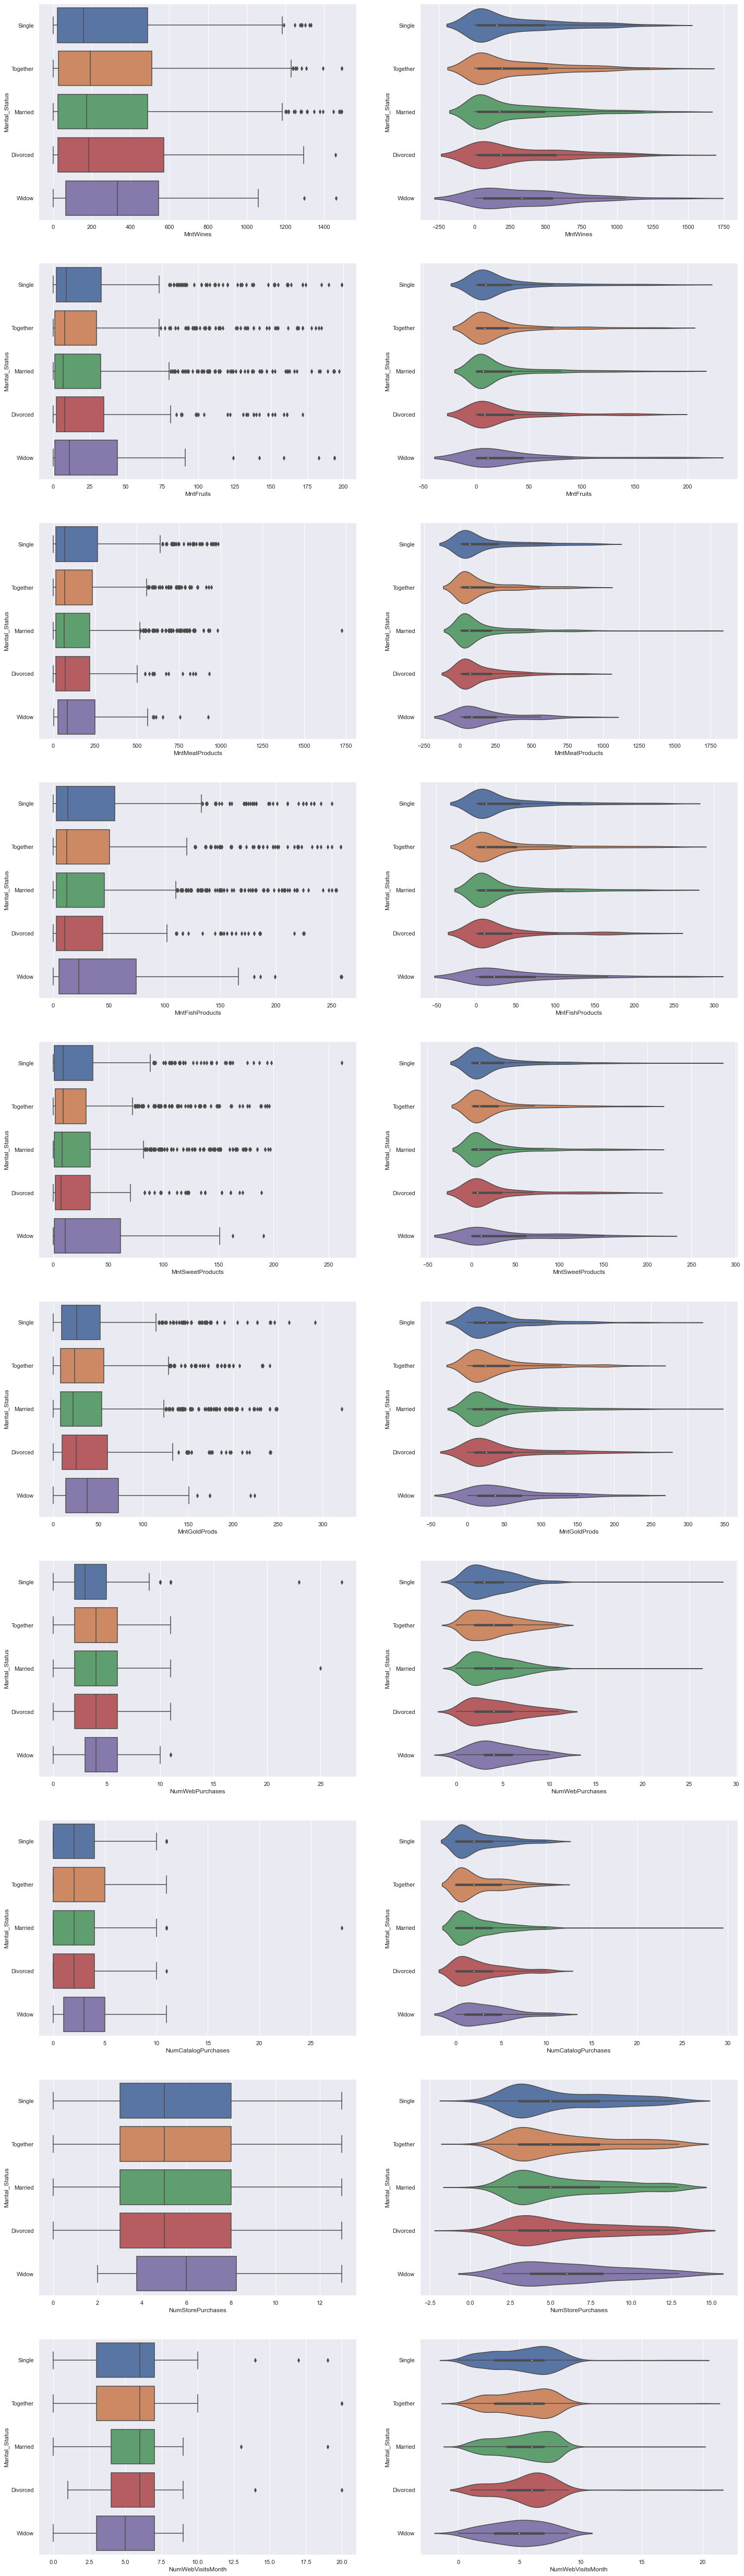

In [330]:
# Boxplot of  Marital Status against response variables
print(f"Marital_Status:\n{new_df4.Marital_Status.value_counts()}")
f, axes = plt.subplots(10, 2, figsize=(24, 90))
sb.boxplot(x = "MntWines", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[0][0])
sb.boxplot(x = "MntFruits", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[1][0])
sb.boxplot(x = "MntMeatProducts", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[2][0])
sb.boxplot(x = "MntFishProducts", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[3][0])
sb.boxplot(x = "MntSweetProducts", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[4][0])
sb.boxplot(x = "MntGoldProds", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[5][0])
sb.boxplot(x = "NumWebPurchases", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[6][0])
sb.boxplot(x = "NumCatalogPurchases", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[7][0])
sb.boxplot(x = "NumStorePurchases", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[8][0])
sb.boxplot(x = "NumWebVisitsMonth", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[9][0])

sb.violinplot(x = "MntWines", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[0][1])
sb.violinplot(x = "MntFruits", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[1][1])
sb.violinplot(x = "MntMeatProducts", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[2][1])
sb.violinplot(x = "MntFishProducts", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[3][1])
sb.violinplot(x = "MntSweetProducts", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[4][1])
sb.violinplot(x = "MntGoldProds", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[5][1])
sb.violinplot(x = "NumWebPurchases", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[6][1])
sb.violinplot(x = "NumCatalogPurchases", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[7][1])
sb.violinplot(x = "NumStorePurchases", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[8][1])
sb.violinplot(x = "NumWebVisitsMonth", y = "Marital_Status", data = new_df4, orient = "h", ax=axes[9][1])

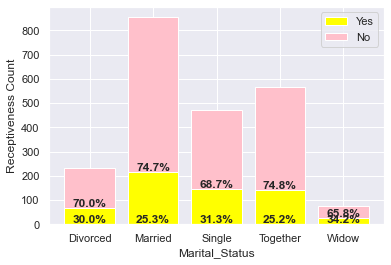

In [419]:
# Stacked bar graph for Marital Status against Responsiveness
counts = new_df4[["Marital_Status","Receptiveness","Income"]].groupby(["Marital_Status",'Receptiveness']).count()
counts = counts.fillna(0)

counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
levels = counts.index.values

s1 = plt.bar(levels, counts['Yes'], bottom=None, color='yellow', label='Yes')
s2 = plt.bar(levels, counts['No'], bottom=counts['Yes'], color='pink', label='No')
plt.legend()
plt.xlabel("Marital_Status")
plt.ylabel('Receptiveness Count')

i=0
for p in s1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+5,
             str((counts["Yes"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1
    
i=0
for p in s2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+5,
             str((counts["No"][i]/(counts["Yes"][i]+counts["No"][i])*100).round(1))+'%',
             ha='center',
             weight='bold')
    i += 1

### Observations
#### <u>Receptiveness towards promotions
From the stacked bar graph above, it seems there is **no well-defined relationship between "Marital_Status" and "Receptiveness"** towards promotions. This is so as the proportion of data points that are receptive towards promotions hover between roughly 25% and 35% across all levels of Marital Statuses.

#### <u>Spending on various products, Method of purchase & Number of Website Visits
From the plots above, it seems as though **"Marital_Status" in general has a weak relationship with the response variables** that we will be analysing later on. This can be seen from the similar distributions between the various levels of "Marital_Status" for each response variable. Therefore, we **did not choose "Marital_Status" to be a feature for clustering** as well.


To statistically show that the distributions are similar, we did a **T-test** between the levels of "Marital_Status" for every response variable as seen in the heatmaps below.


#### <u>Statistical way of showing that the distributions between the different levels of Marital Status are similar

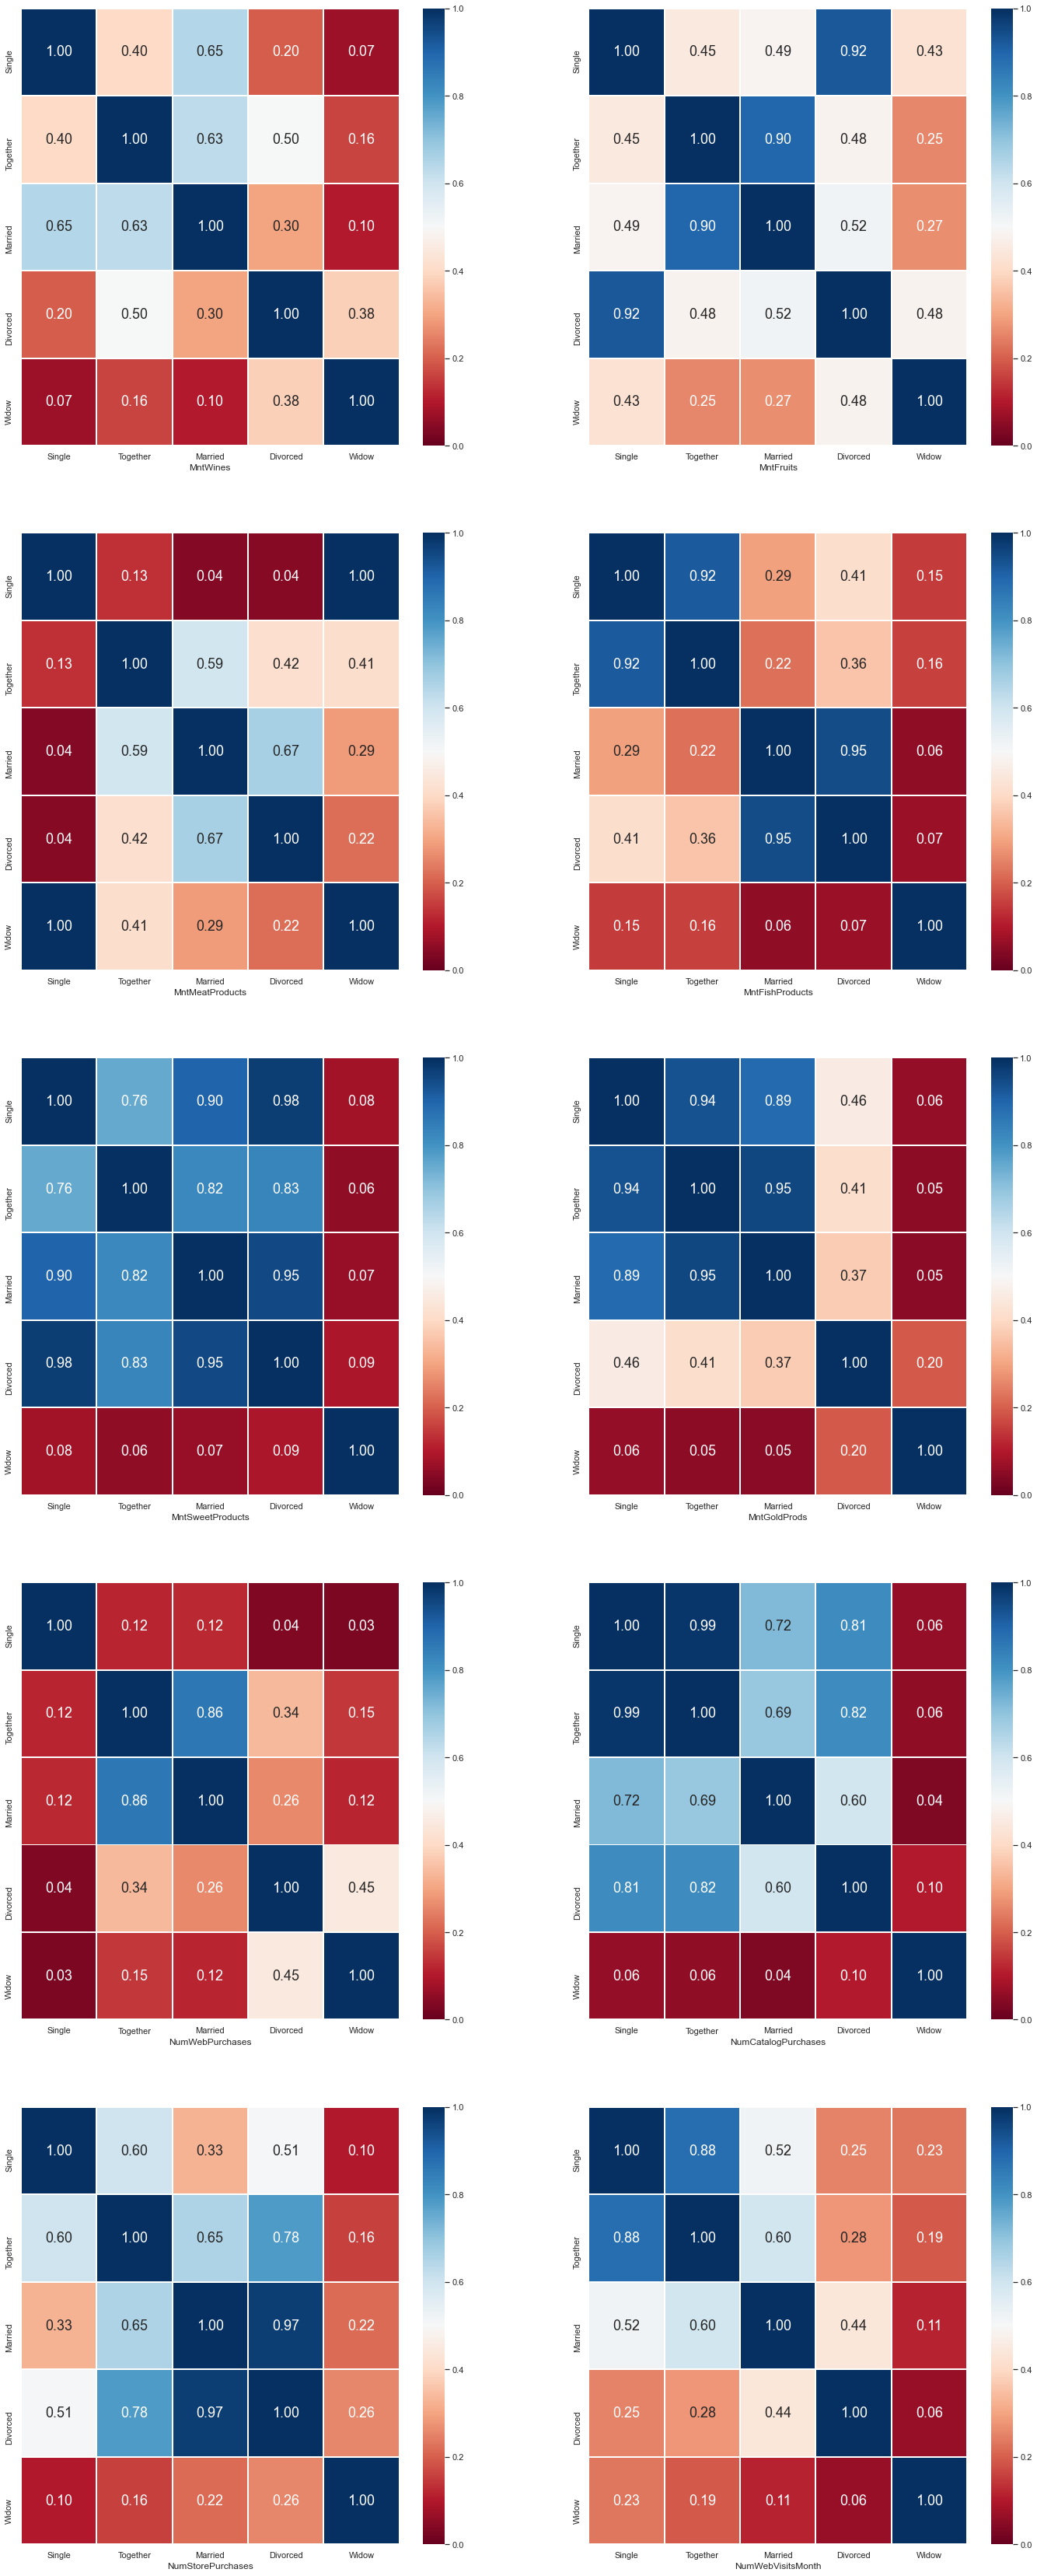

In [426]:
f, axes = plt.subplots(5, 2, figsize=(24, 60))

purchases = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
marital_statuses = ["Single", "Together", "Married", "Divorced", "Widow"]
count = 0
for purchase in purchases:
    data_purchase = new_df4[purchase]
    marital_status_purchase = {}
    for i in marital_statuses:
        marital_status_purchase[i] = data_purchase[new_df4["Marital_Status"]==i]

    t_test_scores = []
    for i in marital_statuses:
        temp = []
        for j in marital_statuses:
            temp.append(stats.ttest_ind(marital_status_purchase[i], marital_status_purchase[j], equal_var=False)[1])
        t_test_scores.append(temp)
    t_test_scores = pd.DataFrame(t_test_scores, columns=marital_statuses)

    s = sb.heatmap(t_test_scores, vmin = 0, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu", ax=axes[count//2][count%2], yticklabels=marital_statuses)
    s.set(xlabel=purchase)
    count += 1

#### Explaination of the above
*T-test determines whether 2 sets of data are significantly different from each other*. The above heatmaps display the p-values from the T-test of each Marital_Status level against each other. **When p-value is below 0.05, we determine that the 2 distributions used are different from each other**. 

Looking at the heatmaps above, we can see that **most values p-values are well above 0.05**. There are **only a few p-values that are lower than 0.05**. Observing the heatmap above, we see mostly see this when comparing **between 'Widow' and the other levels of "Marital_Status"**. This could mean that the current distribution of 'Widow' is **different** from the rest of the levels. However, we noted that **the proportion of data points with 'Widow' is skewed** with only 76 data points (3.43%) earlier. This could mean that the distributions here for each of the response variables for 'Widow' may not be reflective of the actual distributions. Hence we are unable to ascertain if the distributions of 'Widow' here for every response variable is really different from that of the other levels of "Marital_Status".

However, there are three p-value less than 0.05 that is not between 'Widow' and other levels (between 'Single' and 'Divorce'/'Married' for MntMeatProducts, between 'Single' and 'Divorced'for "NumWebPurchases). Even then, the **p-value is 0.04 which is not much lower than 0.05**. This suggests that the **distributions for each level of Marital Status against the various numerical response variables are very similar to each other**.

#### Things to Note
However, is vital to note that **the proportion of data with 'Widow' and 'Divorced' Marital Status are skewed** as mentioned earlier. This could mean that the current distributions may not be reflective of the actual distributions for these two levels. Hence, **the above analysis may not hold true**. Even if the distributions which we have now are reflective of the actual distributions, Marital Status is **still not a good feature** to consider for clustering since **all "Marital_Status" levels have similar spending habits and receptiveness towards promotions**. Furthermore, unlike "Age", advertisements are not designed according to the Marital Status of the target audience.

<br>
<br>
<br>
<br>

---

# C) Machine Learning (K-Prototype Cluster analysis)
Now that we are about the reach the stage of clustering, we have to first drop all response variables we wish to study afterwards and the unwanted features ("Education" and "Marital Status"). Hence, X, the dataframe which we will perform the clustering on, should only have "Age", "Income", "Kidhome" and "Teenhome".

We chose **K-Prototypes** as our clustering model as it is able to cluster a dataset **with mixed data types** like ours. To learn how to implement the K-Prototypes model, we took reference from **"The k-prototype as Clustering Algorithm for Mixed Data Type (Categorical and Numerical)" by Audhi Aprillant** and **"K-Prototypes clustering — for when you’re clustering dynamic, real world data" by Zach Zazueta**.

We downloaded KPrototypes from kmodes in PyPI.

In [336]:
X = new_df4.drop(new_df4.iloc[:,list(range(6,17))+[1,2]],axis=1,inplace=False)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2198 non-null   int64  
 1   Income    2198 non-null   float64
 2   Kidhome   2198 non-null   object 
 3   Teenhome  2198 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 68.8+ KB


## Scaling all numerical variables
*Scaling ensures that all numeric features contribute equally to the result* (Zazueta, 2020). This is especially important as the clustering model that we will be using, K-Prototypes, is **distance-based**. This will ensure that **equal weights are accorded to each of the clustering features** which will give rise to a more accurate clustering result. For X, the two numerical variables are "Income" and "Age".

During our research we found two different approaches: standardisation and normalisation. We found that **normalisation is typically done when the data does not have a normal distribution**, and vice versa for Standardisation (Zazueta, 2020). 

As the distributions for **"Income" and "Age" do not seem to follow a normal distribution** as seen earlier, we decided to go ahead with **normalisation**.

In [337]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [338]:
X.iloc[:,[0,1]].head()

Age   Income
0   57  58138.0
1   60  46344.0
2   49  71613.0
3   30  26646.0
4   33  58293.0

In [339]:
# Array of all numerical variables (Age and Income)
X_numray = X.iloc[:,[0,1]].to_numpy()
X_numray

array([[5.7000e+01, 5.8138e+04],
       [6.0000e+01, 4.6344e+04],
       [4.9000e+01, 7.1613e+04],
       ...,
       [3.3000e+01, 5.6981e+04],
       [5.8000e+01, 6.9245e+04],
       [6.0000e+01, 5.2869e+04]])

In [340]:
# Normalising the numerical variables
normalised = min_max_scaler.fit_transform(X.iloc[:,[0,1]])
normalised

array([[0.69642857, 0.50362487],
       [0.75      , 0.39832506],
       [0.55357143, 0.62393307],
       ...,
       [0.26785714, 0.49329488],
       [0.71428571, 0.60279097],
       [0.75      , 0.45658191]])

### Replacing original numerical values with scalled values

In [341]:
# Creating dataframe of normalised numerical values
norm_df = pd.DataFrame(data = normalised).rename(columns={0:'AgeNorm', 1:'Income'})
norm_df

AgeNorm    Income
0     0.696429  0.503625
1     0.750000  0.398325
2     0.553571  0.623933
3     0.214286  0.222456
4     0.267857  0.505009
...        ...       ...
2193  0.517857  0.531169
2194  0.892857  0.556087
2195  0.267857  0.493295
2196  0.714286  0.602791
2197  0.750000  0.456582

[2198 rows x 2 columns]

In [342]:
# Dropping unscalled Age and Income from old dataframe (X)
X_cat = X.drop(X.iloc[:,[0,1]], axis=1, inplace=False)
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kidhome   2198 non-null   object
 1   Teenhome  2198 non-null   object
dtypes: object(2)
memory usage: 34.5+ KB


In [343]:
# Concatenating both dataframes to form X_Norm
X_Norm = pd.concat([norm_df, X_cat], axis=1)
X_Norm.info()
X_Norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AgeNorm   2198 non-null   float64
 1   Income    2198 non-null   float64
 2   Kidhome   2198 non-null   object 
 3   Teenhome  2198 non-null   object 
dtypes: float64(2), object(2)
memory usage: 68.8+ KB


AgeNorm    Income    Kidhome    Teenhome
0  0.696429  0.503625    No Kids    No Teens
1  0.750000  0.398325  Have Kids  Have Teens
2  0.553571  0.623933    No Kids    No Teens
3  0.214286  0.222456  Have Kids    No Teens
4  0.267857  0.505009  Have Kids    No Teens

## Elbow method for determining optimum k-value
Like any clustering model, K-Prototype provides a cost function that we can use for our elbow plot (Aprilliant, 2022). Hence, we utilised this cost function in creating the elbow plot that helps us determine the optimum k-value. *The optimum k-value would correspond to that at the 'elbow' or a strong Point of Inflection on the curve* (*Elbow method*, n.d.).

In [344]:
# Installing kmodes
pip install kmodes --upgrade kmodes

Note: you may need to restart the kernel to use updated packages.


In [345]:
# Importing KPrototypes
from kmodes.kprototypes import KPrototypes

Work in Progress
											Cluster 1 completed!
Work in Progress
											Cluster 2 completed!
Work in Progress
											Cluster 3 completed!
Work in Progress
											Cluster 4 completed!
Work in Progress
											Cluster 5 completed!
Work in Progress
											Cluster 6 completed!
Work in Progress
											Cluster 7 completed!
Work in Progress
											Cluster 8 completed!
Work in Progress
											Cluster 9 completed!
Work in Progress
											Cluster 10 completed!
Work in Progress
											Cluster 11 completed!
Work in Progress
											Cluster 12 completed!


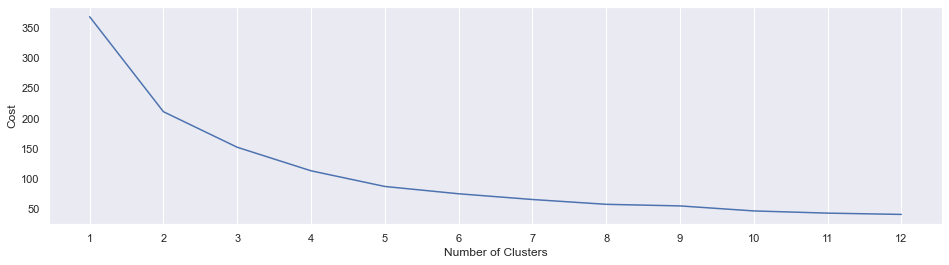

In [346]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 12
init_algo = 'Huang'

# List of categorical variables index
Xcat_idx = [2,3] #Kidhome, Teenhome

# Compute Cost
kproto_cost = []
for num_clust in range(min_clust, max_clust+1):
    try:
        print("Work in Progress")
        kproto = KPrototypes(n_clusters = num_clust, init = 'Huang', random_state = 0)
        #KPrototypes(n_clusters=num_clust, init = init_algo, verbose=1, max_iter=5)
        clusters = kproto.fit_predict(X_Norm.to_numpy(), categorical=Xcat_idx)
        kproto_cost.append(kproto.cost_)
        print(f"\t\t\t\t\t\t\t\t\t\t\tCluster {num_clust} completed!")
    except:
        print("failed!")
        break;

# Angle Plot : Cost Function vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), kproto_cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### From the elbow plot above, we can visually see that the optimal number of clusters is somewhere around 3 to 5.

To further verify what the elbow is, we used a **knee point detection algorithm called Kneedle**. To learn how to do this, we took reference from *"How to use knee point detection in k means clustering" from Practical Data Science website*.

We imported the kneedle algorithm form PyPI as well.

In [347]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [348]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
dict_cost_c3 = {}
for i in range(len(kproto_cost)):
    dict_cost_c3[i] = kproto_cost[i]
cost_knee_c3 = KneeLocator(
        x=list(dict_cost_c3.keys()), 
        y=list(dict_cost_c3.values()), 
        S=0.1, curve="convex", direction="decreasing", online=False) ### online=False gives the first knee/elbow point

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


<br>

## Optimum k-value is at k = 3
From running the knee point detection algorithm above, we identified that the "elbow" of the elbow plot we did is at **k = 3**. This means that the **optimum number of clusters we should have is 3**.

Hence, this time we ran the K-Prototypes with hyperparameter k = 3. We stored the clustering results under a new variable "Clusters" in a separate dataframe called X_labelled.

In [349]:
#creating model
kproto = KPrototypes(n_clusters = 3, init = 'Huang', random_state = 0)

#Obtaining an array of classes corresponding to each data row
clusters = kproto.fit_predict(X_Norm.to_numpy(), categorical=Xcat_idx)

# Storing labels in a new dataframe
X_labelled = X.copy() # age,income not scalled
X_labelled['Clusters'] = list(clusters)

In [350]:
X_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2198 non-null   int64  
 1   Income    2198 non-null   float64
 2   Kidhome   2198 non-null   object 
 3   Teenhome  2198 non-null   object 
 4   Clusters  2198 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 86.0+ KB


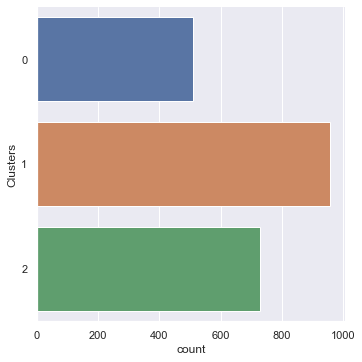

In [351]:
sb.catplot(y='Clusters', data = X_labelled, kind="count")

<br>



### As the data type of "Clusters" was int64, we converted it to a category data type

In [352]:
X_labelled['Clusters'] = pd.Categorical(clusters)

# Serializing our model results
We decided to analyse our clustering results in a separate notebook. Hence, we did this to serialise the results of our model into a data file which will be deserialised in our second notebook.

In [353]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [355]:
import dill
dill.dump_session('dataFile.db')

# Please take a look at our second notebook :)

## <u>References

> Aprilliant, A. (2022, March 31). The K-prototype as clustering algorithm for mixed data type (categorical and numerical). Medium. Retrieved April 22, 2022, from https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb 

> Elbow method. Elbow Method - Yellowbrick v1.4 documentation. (n.d.). Retrieved April 22, 2022, from https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=If%20the%20line%20chart%20looks,fits%20best%20at%20that%20point. 
    

> How to use knee point detection in K means clustering. Practical Data Science. (2021, March 12). Retrieved April 22, 2022, from https://practicaldatascience.co.uk/machine-learning/how-to-use-knee-point-detection-in-k-means-clustering 
    
>Imputation techniques: What are the types of imputation techniques. Analytics Vidhya. (2021, June 30). Retrieved April 22, 2022, from https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/ 
    
>Saldanha, R. (2020, May 8). Marketing campaign. Kaggle. Retrieved April 23, 2022, from https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign 
    
> Zazueta, Z. (2020, October 1). Data transformation in ML - standardization vs normalization. Medium. Retrieved April 22, 2022, from https://zachary-a-zazueta.medium.com/data-transformation-in-ml-standardization-vs-normalization-70ba26de9060 

    
>Zazueta, Z. (2021, August 7). K-prototypes clustering - for when you're clustering continuous and categorical data. Medium. Retrieved April 23, 2022, from https://zachary-a-zazueta.medium.com/k-prototypes-clustering-for-when-youre-clustering-continuous-and-categorical-data-6ea42c2ab2b9 
    
<br>